# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Изучение общей информации

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import matplotlib as mpl

Сохраним таблицу в переменную "data" и выведем превые 5 строк

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv')
except:
    data = pd.read_csv(r'C:\Users\Admiral\Desktop\учеба\практикум\Проекты\Datasets\02.csv')
display(data.head())

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Все склеилось, добавим разделитель и выведем первые 5 строк

In [3]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv(r'C:\Users\Admiral\Desktop\учеба\практикум\Проекты\Datasets\02.csv', sep='\t')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Некоторые наименования столбцов не очень приятно читать, лучше заменить их. Кроме того из 22-ух столбцов отображаются всего 20. Увеличим вывод максимального количества столбцов до 30-ти.

In [4]:
denomination = [
    ['airports_nearest', 'расстояние до ближайшего аэропорта в метрах (м)', 'airport_dist'], 
    ['balcony', 'число балконов', 'balcony'], 
    ['ceiling_height', 'высота потолков (м)', 'ceiling'], 
    ['cityCenters_nearest', 'расстояние до центра города (м)', 'center_dist'], 
    ['days_exposition', 'сколько дней было размещено объявление', 'days_exposition'], 
    ['first_day_exposition', 'дата публикации', 'placement_date'], 
    ['floor', 'этаж', 'floor'], 
    ['floors_total', 'всего этажей в доме', 'floors_total'], 
    ['is_apartment', 'апартаменты (булев тип)', 'is_apt'], 
    ['kitchen_area', 'площадь кухни в квадратных метрах (м²)', 'kitchen_area'], 
    ['last_price', 'цена на момент снятия с публикации', 'price'], 
    ['living_area', 'жилая площадь в квадратных метрах(м²)', 'living_area'], 
    ['locality_name', 'название населённого пункта', 'position'], 
    ['open_plan', 'свободная планировка (булев тип)', 'open_plan'], 
    ['parks_around3000', 'число парков в радиусе 3 км', 'parks'], 
    ['parks_nearest', 'расстояние до ближайшего парка (м)', 'park_dist'], 
    ['ponds_around3000', 'число водоёмов в радиусе 3 км', 'ponds'], 
    ['ponds_nearest', 'расстояние до ближайшего водоёма (м)', 'pond_dist'], 
    ['rooms', 'число комнат', 'rooms'], 
    ['studio', 'квартира-студия (булев тип)', 'studio'], 
    ['total_area', 'площадь квартиры в квадратных метрах (м²)', 'total_area'], 
    ['total_images', 'число фотографий квартиры в объявлении', 'images']
]
col = ['наименование', 'расшифровка', 'новое наименование']
my_columns = pd.DataFrame(data = denomination, columns = col)
display(my_columns)

,наименование,расшифровка,новое наименование
0,airports_nearest,расстояние до ближайшего аэропорта в метрах (м),airport_dist
1,balcony,число балконов,balcony
2,ceiling_height,высота потолков (м),ceiling
3,cityCenters_nearest,расстояние до центра города (м),center_dist
4,days_exposition,сколько дней было размещено объявление,days_exposition
5,first_day_exposition,дата публикации,placement_date
6,floor,этаж,floor
7,floors_total,всего этажей в доме,floors_total
8,is_apartment,апартаменты (булев тип),is_apt
9,kitchen_area,площадь кухни в квадратных метрах (м²),kitchen_area


In [5]:
data.columns = ['images', 'price', 'total_area', 'placement_date', 
                'rooms', 'ceiling', 'floors_total', 'living_area', 
                'floor', 'is_apt', 'studio', 'open_plan', 'kitchen_area', 
                'balcony', 'position', 'airport_dist', 'center_dist', 'parks', 
                'park_dist', 'ponds', 'pond_dist', 'days_exposition']
pd.set_option('display.max_columns', 30)

Изучим первые и последнии 10 строк таблицы

In [6]:
display(data.head(10))
display(data.tail(10))

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,position,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,position,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,False,False,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,False,False,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,False,False,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,False,False,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,False,False,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,False,False,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Выведем общую информацию по таблице

In [7]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   images           23699 non-null  int64  
 1   price            23699 non-null  float64
 2   total_area       23699 non-null  float64
 3   placement_date   23699 non-null  object 
 4   rooms            23699 non-null  int64  
 5   ceiling          14504 non-null  float64
 6   floors_total     23613 non-null  float64
 7   living_area      21796 non-null  float64
 8   floor            23699 non-null  int64  
 9   is_apt           2775 non-null   object 
 10  studio           23699 non-null  bool   
 11  open_plan        23699 non-null  bool   
 12  kitchen_area     21421 non-null  float64
 13  balcony          12180 non-null  float64
 14  position         23650 non-null  object 
 15  airport_dist     18157 non-null  float64
 16  center_dist      18180 non-null  float64
 17  parks       

None

Проверим максимальное и минимальное значения столбца  "total_images"

In [8]:
(display('Максимальное значение {}, минимальное значение {}'
        .format(data['images'].max(), data['images'].min()))
)

'Максимальное значение 50, минимальное значение 0'

Проверим верхнее и нижнее ценовое значение и выведем диаграмму размаха

In [9]:
(display('Максимальнае цена {:.2F} млн.руб., минимальная цена {:.2f} тыс.руб.'
        .format((data['price'].max() / 1000000), (data['price'].min() / 1000)))
)

'Максимальнае цена 763.00 млн.руб., минимальная цена 12.19 тыс.руб.'

Проверим наибольшую и наименьшую площади и выведем диаграмму размаха

In [10]:
(display('Наибольшая площадь {} кв.м., наименьшая площадь {} кв.м.'
        .format(data['total_area'].max(), data['total_area'].min()))
)

'Наибольшая площадь 900.0 кв.м., наименьшая площадь 12.0 кв.м.'

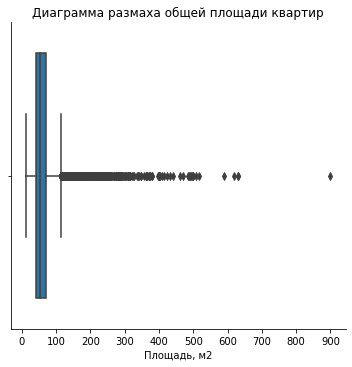

In [11]:
sns.catplot(x='total_area',
            kind='box',
            data=data)
plt.title('Диаграмма размаха общей площади квартир')
plt.xlabel('Площадь, м2')
plt.xticks(np.arange(0, 901, 100.0))
plt.show()

Проверим размах по количеству комнат и выведем диаграмму размаха

In [12]:
(display('Максимальное количество комнат {}, минимальное количество комнат {}'
        .format(data['rooms'].max(), data['rooms'].min()))
)

'Максимальное количество комнат 19, минимальное количество комнат 0'

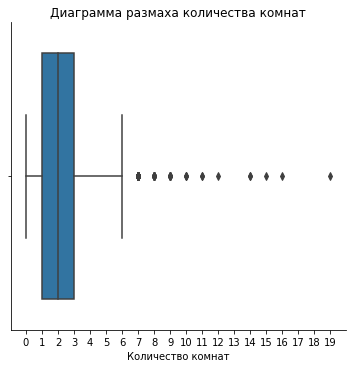

In [13]:
sns.catplot(x='rooms',
            kind='box',
            data=data)
plt.title('Диаграмма размаха количества комнат')
plt.xlabel('Количество комнат')
plt.xticks(np.arange(0, 20, 1.0))
plt.show()

Проверим крайнии величины высоты потолка и выведем диаграмму размаха

In [14]:
(display('Максимальная высота потолка {}, минимальная высота потолка {}'
        .format(data['ceiling'].max(), data['ceiling'].min()))
)

'Максимальная высота потолка 100.0, минимальная высота потолка 1.0'

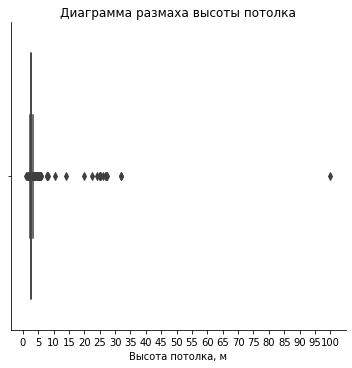

In [15]:
sns.catplot(x='ceiling',
            kind='box',
            data=data)
plt.title('Диаграмма размаха высоты потолка')
plt.xlabel('Высота потолка, м')
plt.xticks(np.arange(0, 101, 5.0))
plt.show()

Проверим этажность объектов и выведем диаграмму размаха

In [16]:
(display('Максимальная этажность {}, минимальная этажность {}'
        .format(data['floors_total'].max(), data['floors_total'].min()))
)

'Максимальная этажность 60.0, минимальная этажность 1.0'

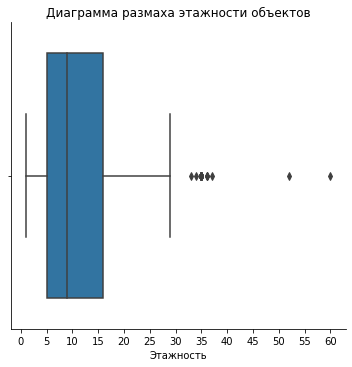

In [17]:
sns.catplot(x='floors_total',
            kind='box',
            data=data)
plt.title('Диаграмма размаха этажности объектов')
plt.xlabel('Этажность')
plt.xticks(np.arange(0, 61, 5.0))
plt.show()

Проверим жилую площадь объектов и выведем диаграмму размаха

In [18]:
(display('Наибольшая площадь {} кв.м., наименьшая площадь {} кв.м.'
        .format(data['living_area'].max(), data['living_area'].min()))
)

'Наибольшая площадь 409.7 кв.м., наименьшая площадь 2.0 кв.м.'

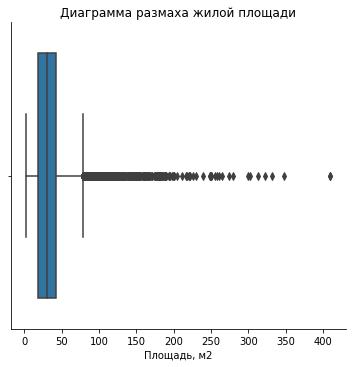

In [19]:
sns.catplot(x='living_area',
            kind='box',
            data=data)
plt.title('Диаграмма размаха жилой площади')
plt.xlabel('Площадь, м2')
plt.xticks(np.arange(0, 410, 50.0))
plt.show()

Проверим разбег по этажам и выведем диаграмму размаха

In [20]:
(display('Верхний этаж {}, нижний этаж {}'
        .format(data['floor'].max(), data['floor'].min()))
)

'Верхний этаж 33, нижний этаж 1'

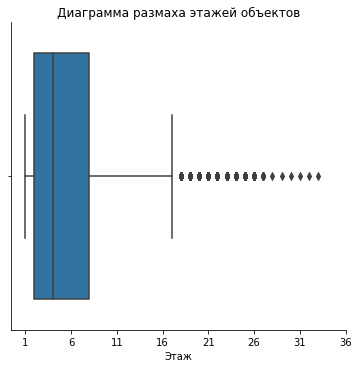

In [21]:
sns.catplot(x='floor',
            kind='box',
            data=data)
plt.title('Диаграмма размаха этажей объектов')
plt.xlabel('Этаж')
plt.xticks(np.arange(1, 40, 5.0))
plt.show()

Проверим количество True и False в столбце "is_apt"

In [22]:
display(data['is_apt'].value_counts())

False    2725
True       50
Name: is_apt, dtype: int64

Выведем диаграмму размаха площади кухни, а после проверим минимальный  и максимальный размер кухни. 

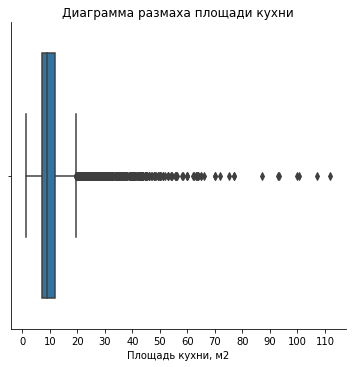

In [23]:
sns.catplot(x='kitchen_area',
            kind='box',
            data=data)
plt.title('Диаграмма размаха площади кухни')
plt.xlabel('Площадь кухни, м2')
plt.xticks(np.arange(0, 120, 10.0))
plt.show()

In [24]:
(display('Наибольшая площадь кухни {} кв.м., наименьшая площадь кухни {} кв.м.'
        .format(data['kitchen_area'].max(), data['kitchen_area'].min()))
)

'Наибольшая площадь кухни 112.0 кв.м., наименьшая площадь кухни 1.3 кв.м.'

Проверим уникальные значения столбца "balcony"

In [25]:
display(data['balcony'].value_counts())

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Проверим количество уникальных значений столбца "position"

In [26]:
display(data['position'].value_counts())

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: position, Length: 364, dtype: int64

Изучим список уникальных значений столбца "position"

In [27]:
display(data['position'].unique())

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [28]:
display(data['position'].unique())

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Проверим максимальное расстояние от объекта до аэропорта

In [29]:
(display('Максимальное расстояние от объекта до аэропорта {} км'
        .format(data['airport_dist'].max() / 1000))
)

'Максимальное расстояние от объекта до аэропорта 84.869 км'

Проверим максимальное расстояние от объекта до аэропорта

In [30]:
(display('Максимальное расстояние от объекта до центра {} км'
        .format(data['center_dist'].max() / 1000))
)

'Максимальное расстояние от объекта до центра 65.968 км'

Проверим количество уникальных значений столбца "parks"

In [31]:
display(data['parks'].value_counts())

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks, dtype: int64

Проверим количество уникальных значений столбца "ponds"

In [32]:
display(data['ponds'].value_counts())

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds, dtype: int64

Проверим максимальное и минимальное расстояния от объекта до парка

In [33]:
(display('Максимальное расстояние от объекта до парка {} км'.format(
    data['park_dist'].max() / 1000)))
(display('Минимальное расстояние от объекта до парка {} м'.format(
    data['park_dist'].min())))

'Максимальное расстояние от объекта до парка 3.19 км'

'Минимальное расстояние от объекта до парка 1.0 м'

Проверим максимальное и минимальное расстояния от объекта до водоема

In [34]:
(display('Максимальное расстояние от объекта до водоема {} км'.format(
    data['pond_dist'].max() / 1000)))
(display('Минимальное расстояние от объекта до водоема {} м'.format(
    data['pond_dist'].min())))

'Максимальное расстояние от объекта до водоема 1.344 км'

'Минимальное расстояние от объекта до водоема 13.0 м'

Проверим размах в количестве дней размещения объекта

In [35]:
(display('Максимальное количество дней размещения объекта: {}'.format(
    data['days_exposition'].max())))
(display('Минимальное количество дней размещения объекта: {}'.format(
    data['days_exposition'].min())))

'Максимальное количество дней размещения объекта: 1580.0'

'Минимальное количество дней размещения объекта: 1.0'

Проверим количество объектов, размещенных более 2-х лет

In [36]:
display(data.query('days_exposition > 730')['days_exposition'].count())

751

Проверим количество дубликатов

In [37]:
display(data.duplicated().sum())

0

### Вывод

1. В большей части столбцов найдены пропущенные значения, нужно будет разобраться с ними отдельно по каждому столбцу проводя предобработку данных.
2. В столбце "images" все корректно, тип данных подходящий.
3. В столбце "price" вероятнее всего цена обозначена в рублях. Максимальное значение (763.00 млн.руб.) похоже на правду, в Питере бывают квартиры стоимостью несколько миллиардов рублей, но нужно будет проверить параметры подобных квартир. А с минимальным значением (12.19 тыс.руб.) что то не так, минимальная стоимость квартиры в Лениниградской области, которую удалось найти, составляет 200 тыс.руб. Необходимо проверить квартиры ниже этой стоимости. Плюс ко всему для удобства читаемости  переведем еденицу измерения в тыс.руб. Тип данных оставим float64 для сохранения точности расчетов. 
4. В столбце "total_area" на первый взгляд все корректно.
5. В столбце "placement_date" необходимо перевести данные в тип datetime64[ns]. В связи с нулевыми значениями времени в первых и последних строках, а так же отсутствием необходимости использования времени, необходимо в данном столбце оставить только дату.
6. В столбце "rooms" максимальное количество комнат составляет 19. Это много, но такое бывает. Но лучше проверить подобные квартиры на соотношение с ценой и площадью. Минимальное количество комнат составляет 0. Вероятно это студии, в таком случае необходимо проверить, стоит ли True в столбце "studio" в таких строках. Тип данных подходящий, int64.
7. В столбце "ceiling" минимальная высота потолка составляет 1 метр. Согласно СНиП высота потолка должна быть не менее 2.5 метра. Но бывают и старые квартиры с высосотой потолка 2.3 метра. Максимальная же высота в столбце составляет 100 метров. Бывают разные элитные квартиры, но 100 метров это перебор. Если столбец понадобится для расчетов, необходимо заменить значения данного столбца не попадающие в ограничение высоты потолка от 2.2 метра до 8 метров (максимальная высота потолка квартиры, которую удалось найти).
8. В столбце "floors_total" после обработки пропущенных значений необходимо изменить тип данных на int64.
9. В столбце "living_area" после обработки пропущенных значений необходимо проверить условие :      ('living_area < total_area')
10. В столбце "floor" все корректно.
11. В столбце "is_apt" 88% пропущенных значений. Можно было бы предположить что все они относятся к значениям False, но значения True в таком случае будут составлять 0.2% от общего количества. На сегодняшний день в Санкт-Петербурге и Ленинградской области количество аппартаментов на продажу составляет почти 4% от общего количества продаваемых аппартаментов/квартир. В связи с этим не предоставляется возможным заполнение данных пропусков каким либо из значений, и ввиду колосального количества пропусков данный столбец не будет учавствовать в анализе.
12. В столбцах "studio" и "open_plan" все корректно.
13. В столбце "kitchen_area" кроме пропущенных значений все корректно. 1.3 кв.м. и 112 кв.м. подозрительно выглядят, но, как оказалось, бывают и такие кухни. Количество пропущенных значений составляет почти 10% от общего, величина не малая, а данный столбец понадобится в анализе. Необходимо заменить пропущенные значения на медианные в зависимости от общей площади, цены и количества комнат.
14. В столбце "balcony" чуть более половины значений пропущены.  Возможно продавцы не сочли важным заполнять данную характеристику. Пока не понятно как поступать с этими значениями. Кроме того имеются квартиры с 4 и 5 балконами. Необходимо проверить их на количество комнат. Мало вероятно наличие 4 и 5 балконов в квартире с 3-мя и менее комнатами. После обработки пропущенных значений необходимо изменить тип данных на int64
15. В столбце "position" находится 364 уникальных населенных пункта. При первичном осмотре списка обнаружились одинаковые населенные пункты с небольшой разницей в значимости обозначения самого населенного пункта, а именно: поселок-посёлок, поселок городского типа - городской поселок и т.д. Часть значений состоит только лишь из наименования населенного пункта. Кроме того случайно обнаружен населенный пункт, не принадлежащий к Ленинградской области, а именно 'деревня Русско', она находися в Новгородской области, возможно такой населенный пункт не в единственном экземпляре.
16. В столбцах "airport_dist" и "center_dist" кроме пропущенных значений ничего необычного не обнаружено. После обработки пропущенных значений стоит перевести расстояние в километры.
17. В столбцах "parks" и "ponds" все корректно за исключением пропущенных значений. После обработки пропущенных значений необходимо изменить тип данных на int64.
18. В столбцах "park_dist" и "ponds_dist" все корректно за исключением пропущенных значений. И таких значений в данных столбцах более 34%. Учитывая меньшее количество пропущенных значений в столбцах "parks" и "ponds", у большей части таких объектов должны быть водоемы и парки в радиусе 3 км. После обработки пропущенных значений необходимо изменить тип данных на int64.
19. В столбце "days_exposition" кроме обработки пропущенных значений необходимо заменить тип данных на int64. А так же уделить внимание объектам, по которым размещение обьявления превышает 2 года. Таких объектов среди общей массы более 3%.
20. В таблице не обнаружено дубликатов.

### Предобработка данных

Создадим копию старой таблицы на всякий случай. Выведем первые 5 строк таблицы для наглядности

In [38]:
old_data = data.copy()
display(data.head())

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,position,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Столбец "position"

В столбце "position" обнаружено 364 уникальных наименований населенных пунктов, но при детальном осмотре выявлены совпадения. Создадим функцию, которая будет получать значение столбца, а возвращать только само наименование населенного пункта

In [39]:
def settlement(meaninig):
    try:
        meaninig  = meaninig.split(' ')
        string = []
        for line in meaninig:
            for word in line.split(' '):
                for letter in word:
                    if letter.isupper():
                        string.append(word)
                        break
        string = ' '.join(string)
        return(string)
    except:
        return(meaninig)

Добавим в таблицу столбец, который заполним обработанные функцией значения столбца "position"

In [40]:
data['new_position'] = data['position'].apply(settlement)

Заменим вручную единственное наименование столбца, которое не корректно попадает под параметры функции

In [41]:
data['new_position'] = data['new_position'].replace('Платформа', 'Платформа 69-й километр')

Проверим количество уникальных значений после обработки

In [42]:
display(len(data['new_position'].value_counts()))

305

Изучим уникальные значения нового столбца

In [43]:
display(data['new_position'].unique())

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

Похоже все прошло успешно. Не думаю что нам понадобится что либо кроме самих наименований населенных пунктов.

Проверим общую информацию таблицы 

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   images           23699 non-null  int64  
 1   price            23699 non-null  float64
 2   total_area       23699 non-null  float64
 3   placement_date   23699 non-null  object 
 4   rooms            23699 non-null  int64  
 5   ceiling          14504 non-null  float64
 6   floors_total     23613 non-null  float64
 7   living_area      21796 non-null  float64
 8   floor            23699 non-null  int64  
 9   is_apt           2775 non-null   object 
 10  studio           23699 non-null  bool   
 11  open_plan        23699 non-null  bool   
 12  kitchen_area     21421 non-null  float64
 13  balcony          12180 non-null  float64
 14  position         23650 non-null  object 
 15  airport_dist     18157 non-null  float64
 16  center_dist      18180 non-null  float64
 17  parks       

Удалим стобец "position" и заменим наименование нового столбца на старое.

In [45]:
data = data.drop(['position'], axis=1)

In [46]:
data.columns = ['images', 'price', 'total_area', 'placement_date', 
                'rooms', 'ceiling', 'floors_total', 'living_area', 
                'floor', 'is_apt', 'studio', 'open_plan', 'kitchen_area', 
                'balcony', 'airport_dist', 'center_dist', 'parks', 
                'park_dist', 'ponds', 'pond_dist', 'days_exposition', 'position']

Просмотрим первые 20 строк обновленной таблицы

In [47]:
display(data.head(20))

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург


Выведем сторки с пропущенными значениями в столбце "position"

In [48]:
display(data[data['position'].isna() == True])

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,False,False,8.80,0.0,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,NaN
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,NaN,4.0,42.60,2,NaN,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0,NaN
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,NaN,24.0,15.60,3,NaN,False,False,10.70,0.0,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,NaN
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,NaN,24.0,33.10,21,NaN,False,False,8.20,0.0,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,NaN
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,NaN,5.0,30.80,5,NaN,False,False,6.50,0.0,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,NaN
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,False,False,13.38,0.0,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,NaN
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,False,False,10.40,0.0,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,NaN
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,NaN,7.0,NaN,6,NaN,False,False,NaN,0.0,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,NaN
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,NaN,7.0,59.10,5,False,False,False,8.30,4.0,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,NaN
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,NaN,24.0,20.00,23,NaN,False,False,NaN,0.0,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,NaN


Пропущенные значения разбросаны хаотично и их количество составляет всего 0.2% от общей массы. Не будем торопиться с удалением этих строк, хоть и их количество слишком мало, заменим пропущенные значения в столбце "position" на "Неизвестно", заменим тип данных на категориальный и выведем общую информацию по таблице

In [49]:
data['position'] = data['position'].fillna('Неизвестно')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   images           23699 non-null  int64  
 1   price            23699 non-null  float64
 2   total_area       23699 non-null  float64
 3   placement_date   23699 non-null  object 
 4   rooms            23699 non-null  int64  
 5   ceiling          14504 non-null  float64
 6   floors_total     23613 non-null  float64
 7   living_area      21796 non-null  float64
 8   floor            23699 non-null  int64  
 9   is_apt           2775 non-null   object 
 10  studio           23699 non-null  bool   
 11  open_plan        23699 non-null  bool   
 12  kitchen_area     21421 non-null  float64
 13  balcony          12180 non-null  float64
 14  airport_dist     18157 non-null  float64
 15  center_dist      18180 non-null  float64
 16  parks            18181 non-null  float64
 17  park_dist   

#### Столбец "price"

Для удобства переведем значения столбца "price" из руб. в тыс.руб., а так же изменим тип данных на float32

In [50]:
data['price'] = data['price'].astype('float32')
data['price'] = data['price'] / 1000

Выведем основные статистические данные по столбцу

In [51]:
display(data['price'].describe())

count     23699.000000
mean       6541.548828
std       10887.012695
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: price, dtype: float64

Проверим стоимости квартир по условию: если квартира находится в Санкт-Петербурге то выведем все стоимостью ниже 1 млн., или все квартиры стоимостью менее 500 тыс.

In [52]:
display(data.query('(price < 1000 and position == "Санкт-Петербург") or price < 500'))

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position
5698,7,450.00,42.0,2017-07-31T00:00:00,2,NaN,1.0,23.0,1,NaN,False,False,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,233.0,Будогощь
6859,6,490.00,40.0,2017-12-11T00:00:00,1,NaN,5.0,NaN,3,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.0,Старополье
8793,7,12.19,109.0,2019-03-20T00:00:00,2,2.75,25.0,32.0,25,NaN,False,False,40.5,NaN,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0,Санкт-Петербург
9581,7,450.00,43.4,2018-08-31T00:00:00,2,NaN,5.0,30.3,3,NaN,False,False,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.0,Старополье
10782,3,490.00,29.1,2016-05-05T00:00:00,1,2.50,5.0,17.0,5,NaN,False,False,5.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,719.0,Сланцы
14911,5,430.00,54.0,2018-06-26T00:00:00,2,NaN,3.0,NaN,3,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Свирь
16032,8,480.00,32.0,2019-01-06T00:00:00,1,NaN,2.0,16.0,1,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.0,Сланцы
16219,14,450.00,38.5,2018-07-11T00:00:00,2,2.65,2.0,NaN,1,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Вахнова Кара
16274,18,440.00,40.0,2018-07-10T00:00:00,1,NaN,5.0,NaN,1,NaN,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Старополье
17456,7,430.00,30.4,2019-04-22T00:00:00,1,NaN,2.0,16.0,1,NaN,False,False,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Сланцы


Из всего списка подозрение вызывает только одна квартира в Санкт-Петербурге стоимостью 12190 руб. Возможно имелось ввиду стоимость 12190 тыс.руб., но не будем гадать, квартира с неадэкватно низкой ценой всего одна, избавимся от некорректного объявления

In [53]:
data = data.query('price > 200').reset_index(drop=True)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23698 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   images           23698 non-null  int64  
 1   price            23698 non-null  float32
 2   total_area       23698 non-null  float64
 3   placement_date   23698 non-null  object 
 4   rooms            23698 non-null  int64  
 5   ceiling          14503 non-null  float64
 6   floors_total     23612 non-null  float64
 7   living_area      21795 non-null  float64
 8   floor            23698 non-null  int64  
 9   is_apt           2775 non-null   object 
 10  studio           23698 non-null  bool   
 11  open_plan        23698 non-null  bool   
 12  kitchen_area     21420 non-null  float64
 13  balcony          12180 non-null  float64
 14  airport_dist     18156 non-null  float64
 15  center_dist      18179 non-null  float64
 16  parks            18180 non-null  float64
 17  park_dist   

Проверим количество квартир стоимостью более 50  млн.

In [55]:
display(data.query('price > 50000')['price'].count())

131

Проверим адекватность цен таких квартир. Выведем количество квартир по условию: стоимость более 50млн., площадь менее 100 кв.м. и расположение не в городе Санкт-Петербург.

In [56]:
display(data.query('price > 50000 and total_area < 100 and position != "Санкт-Петербург"')['price'].count())

0

Таких квартир не оказалось, цены похожи на правду.

#### Столбец "placement_date"

Изменим тип данных на datetime64[ns] и оставим только дату без времени. Проверим изменение

In [57]:
data['placement_date'] = pd.to_datetime(data['placement_date'],
format='%Y.%m.%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23698 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   images           23698 non-null  int64         
 1   price            23698 non-null  float32       
 2   total_area       23698 non-null  float64       
 3   placement_date   23698 non-null  datetime64[ns]
 4   rooms            23698 non-null  int64         
 5   ceiling          14503 non-null  float64       
 6   floors_total     23612 non-null  float64       
 7   living_area      21795 non-null  float64       
 8   floor            23698 non-null  int64         
 9   is_apt           2775 non-null   object        
 10  studio           23698 non-null  bool          
 11  open_plan        23698 non-null  bool          
 12  kitchen_area     21420 non-null  float64       
 13  balcony          12180 non-null  float64       
 14  airport_dist     18156 non-null  float

#### Столбец "rooms"

Проверим среднюю площадь одной комнаты для квартир с разным количеством комнат. Выведем сводную таблицу соотношения количества комнат и медианной общей площади

In [58]:
rooms_area = data.query('rooms > 0').pivot_table(
    index='rooms', values='total_area', aggfunc=['count', 'median'])

Заменим наименование столбцов

In [59]:
rooms_area.columns = ['count', 'total_area']

Добавим столбец средней площади одной комнаты и изучим результат

In [60]:
rooms_area['area_of_one_room'] = rooms_area['total_area'] / rooms_area.index 
display(rooms_area)

,count,total_area,area_of_one_room
rooms,,,
1,8047,36.56,36.560000
2,7939,53.00,26.500000
3,5814,73.00,24.333333
4,1180,99.30,24.825000
5,326,146.45,29.290000
6,105,184.30,30.716667
7,59,214.00,30.571429
8,12,235.70,29.462500
9,8,300.95,33.438889


Площадь одной комнаты квартир с количеством комнат до 10 выглядит корректно. Но в квартирах с количеством комнат более 10 площадь или слишком маленькая, или превышает размеры однокомнатной квартиры. Площадь одной комнаты этих квартир не внушает доверия, лучше в дальнейшем при анализе их не учитывать.

Проверим общее количество квартир с количеством комнат равном 0

In [61]:
display(data.query('rooms == 0')['rooms'].count())

197

Проверим общее количество квартир с количеством комнат равным 0 с пометкой студия

In [62]:
display(data[(data['rooms'] == 0) & (data['studio'] == True)]['rooms'].count())

138

Изучим оставшиеся 59 квартир

In [63]:
display(data[(data['rooms'] == 0) & (data['studio'] != True)])

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position
349,4,2320.0,25.00,2017-09-27,0,NaN,14.0,17.0,1,NaN,False,True,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Кудрово
508,0,3375.0,34.40,2017-03-28,0,NaN,26.0,24.3,19,NaN,False,True,NaN,1.0,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0,Парголово
780,9,2600.0,26.10,2018-02-20,0,NaN,18.0,NaN,8,NaN,False,True,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Мурино
839,14,1900.0,35.00,2017-04-14,0,2.70,5.0,15.0,3,False,False,True,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,7.0,Новый Свет
946,5,2200.0,23.00,2016-09-27,0,NaN,27.0,18.0,7,NaN,False,True,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,483.0,Мурино
1574,0,2200.0,22.00,2017-11-03,0,NaN,18.0,15.0,16,NaN,False,True,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,81.0,Кудрово
1625,7,1980.0,23.98,2018-02-01,0,NaN,4.0,10.5,3,NaN,False,True,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,120.0,Корнево
2532,5,3500.0,27.10,2018-02-01,0,NaN,18.0,18.7,9,NaN,False,True,NaN,2.0,32036.0,8175.0,0.0,NaN,1.0,644.0,70.0,Санкт-Петербург
3019,18,2100.0,24.00,2017-11-10,0,NaN,10.0,18.0,6,NaN,False,True,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Сертолово
4115,7,2600.0,24.00,2018-02-01,0,NaN,25.0,18.0,4,NaN,False,True,NaN,2.0,10031.0,13330.0,1.0,915.0,0.0,NaN,42.0,Санкт-Петербург


Проверим общее количество квартир с количеством комнат не равным 0 но с пометкой студия

In [64]:
display(data[(data['rooms'] != 0) & (data['studio'] == True)]['rooms'].count())

11

Изучим эти 11 квартир

In [65]:
display(data[(data['rooms'] != 0) & (data['studio'] == True)])

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position
2389,5,2250.0,25.41,2016-06-07,1,NaN,12.0,17.08,8,False,True,False,NaN,2.0,14125.0,12921.0,2.0,328.0,2.0,485.0,26.0,Санкт-Петербург
3187,13,3800.0,27.00,2016-05-17,1,NaN,14.0,18.00,8,False,True,False,NaN,2.0,50348.0,16053.0,0.0,NaN,0.0,NaN,45.0,Санкт-Петербург
4180,4,4500.0,34.00,2016-04-25,1,2.8,10.0,21.00,10,False,True,False,NaN,2.0,23609.0,5299.0,0.0,NaN,1.0,433.0,62.0,Санкт-Петербург
8683,10,3500.0,32.50,2016-05-05,1,3.0,23.0,29.90,11,False,True,False,NaN,2.0,34967.0,14640.0,0.0,NaN,1.0,564.0,45.0,Санкт-Петербург
11025,1,2800.0,28.00,2016-05-04,1,NaN,26.0,19.00,6,False,True,False,NaN,2.0,53511.0,19687.0,0.0,NaN,0.0,NaN,45.0,Парголово
12934,10,2200.0,31.00,2016-05-15,1,2.5,8.0,22.30,5,False,True,False,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,44.0,Никольское
15141,2,2700.0,30.00,2016-05-10,1,NaN,21.0,26.00,6,False,True,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Кудрово
18731,4,2400.0,22.00,2016-05-06,1,NaN,10.0,15.00,6,NaN,True,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Кудрово
20085,0,1550.0,22.00,2016-05-11,1,2.7,15.0,10.94,14,False,True,False,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,45.0,Никольское
21701,9,2349.0,23.40,2016-05-19,1,2.7,20.0,16.00,8,False,True,False,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,34.0,Новое Девяткино


В итоге имеем:
1. Общее количество квартир с 0 в столбце количества комнат - 197. Из них 138 квартир являются студиями. Оставим 138 квартир с 0 в столбце количества квартир, пусть у всех студий будет 0.
2. Оставшиеся 59 квартир отнесены к категории квартир с открытой планировкой. Судя по общей площади всех кроме одной можно отнести к студиям с открытой планировкой, существует и такое понятие. Квартиру с общей площадью 371 кв.м. отнесем к ближайшей по площади в рамках адекватности и заменим количество комнат на 9.
3. Общее количество квартир с пометкой студия но с количеством комнат больше 0 - 11. Все они подходят по площади под описание студии. Заменим количество комнат у таких квартир на 0.

In [66]:
data.loc[19392, 'rooms'] = 9

In [67]:
data['rooms'] = data['rooms'].where(data['studio'] != True, 0)

Проверим результат, количество студий должно измениться на 207

In [68]:
display(data['rooms'].value_counts())

1     8035
2     7939
3     5814
4     1180
5      326
0      208
6      105
7       59
8       12
9        9
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Изменим тип данных на uint8

In [69]:
data['rooms'] = data['rooms'].astype('uint8')

#### Столбец "floors_total"

В столбце "floors_total" всего 86 пропущенных значений, что составляет менее 0.4% от всех объектов. Проверим корреляцию с остальными параметрами квартиры и заполним пропуски медианным значением в зависимости от максимально коррелируемого параметра и от наименования населенного пункта. Но для начала проверим квартиры с этажностью выше 30.

In [70]:
display(data.query('floors_total > 30'))

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position
397,15,5990.000000,54.0,2018-03-22,2,NaN,36.0,21.4,28,NaN,False,False,18.70,1.0,18732.0,20444.0,0.0,NaN,3.0,80.0,11.0,Санкт-Петербург
871,14,7777.776855,75.0,2017-11-16,2,NaN,35.0,40.5,23,NaN,False,False,11.70,NaN,18732.0,20444.0,0.0,NaN,3.0,80.0,169.0,Санкт-Петербург
1060,10,5200.000000,50.0,2015-11-06,2,NaN,35.0,39.0,15,False,False,False,20.50,2.0,18732.0,20444.0,0.0,NaN,3.0,80.0,281.0,Санкт-Петербург
1697,11,3550.000000,28.0,2018-02-08,1,2.65,34.0,18.0,23,NaN,False,False,NaN,NaN,18732.0,20444.0,0.0,NaN,3.0,80.0,410.0,Санкт-Петербург
1917,13,10150.000000,74.0,2017-11-17,2,2.80,35.0,34.4,30,NaN,False,False,13.00,NaN,18732.0,20444.0,0.0,NaN,3.0,80.0,NaN,Санкт-Петербург
2253,12,3800.000000,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,False,False,7.40,NaN,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,Кронштадт
2966,9,4300.000000,37.0,2017-08-08,1,NaN,35.0,14.0,15,NaN,False,False,10.40,0.0,18732.0,20444.0,0.0,NaN,3.0,80.0,50.0,Санкт-Петербург
4855,12,5500.000000,50.0,2017-06-22,1,2.80,35.0,22.0,4,NaN,False,False,13.00,NaN,18627.0,20339.0,1.0,609.0,3.0,145.0,537.0,Санкт-Петербург
5749,20,3590.000000,25.0,2017-08-30,0,2.80,35.0,NaN,26,NaN,False,True,NaN,2.0,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0,Санкт-Петербург
5807,17,8150.000000,80.0,2019-01-09,2,27.00,36.0,41.0,13,NaN,False,False,12.00,5.0,18732.0,20444.0,0.0,NaN,3.0,80.0,38.0,Санкт-Петербург


Все кроме одной находятся в Санкт-Петербурге. Это похоже на правду. Но одна с этажностью равной 60, находится в Кронштадте. Как выяснилось, самым высоким зданием в Кронштадте является Никольский собор высотой 70.6 м. При таком условии максимальное количество этажей в квартирных домах в Кронштадте на данный момент не может превышать 28 этажей. Возможно это опечатка и этажность равняется 6-ти, так как квартира находится на 4 этаже. Изменим этажность на 6 и проверим результат

In [71]:
data = data.replace(60, 6)
display(data.query('floors_total == 60')['floors_total'].count())

0

Проверим корреляцию с другими параметрами

In [72]:
display(data[data.columns[1:14]].corr()['floors_total'])

price          -0.006850
total_area     -0.072227
rooms          -0.228407
ceiling        -0.028850
floors_total    1.000000
living_area    -0.170406
floor           0.678917
studio          0.070275
open_plan       0.050879
kitchen_area    0.164884
balcony         0.194065
Name: floors_total, dtype: float64

Максимальная корреляция с параметром этаж объекта. Выведем диаграмму рассеяния

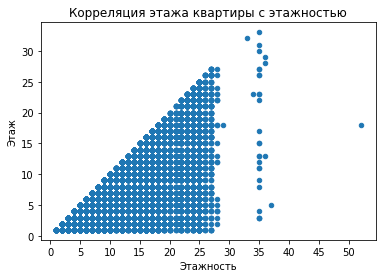

In [73]:
data.plot(x='floors_total', y='floor', kind='scatter')
plt.title('Корреляция этажа квартиры с этажностью')
plt.xlabel('Этажность')
plt.ylabel('Этаж')
plt.xticks(np.arange(0, 54, 5.0))
plt.show()

Как оказалось, явной зависимости нет. По диаграмме видно только, что этаж объекта не превышает этажность здания в котором расположен объект. При использовании медианного значения этот параметр поможет не привысить этажность. Добавим к этому зависимость от наименования населенного пункта и стоимости объекта ниже 100 млн.руб., и выведем медианное значение для пропущенных значений в столбце "floors_total".

In [74]:
data['floors_total'] = data['floors_total'].fillna(
    data.query('price <= 100000').groupby
    (['position', 'floor', 'price'])['floors_total'].transform('median'))

In [75]:
display(len(data[data['floors_total'].isna()]))

62

Часть квартир не попала под такую группировку, упростим ее, оставив только зависимость от этажа объекта. После этого проверим остаток пустых значений

In [76]:
data['floors_total'] = data['floors_total'].fillna(
    data.groupby
    ('floor')['floors_total'].transform('median'))
display(data[data['floors_total'].isna()]['floor'].count())

0

Изменим тип данных на uint8

In [77]:
data['floors_total'] = data['floors_total'].astype('uint8')

Проверим корректность этажности в зависимости от этажа объекта

In [78]:
display(len(data[data['floors_total'] < data['floor']]))

0

Замена пропущенных значений прошла успешно.

#### Столбец "ceiling"

Для начала проверим количество объектов, которые не попадают в ограничение высоты потолка от 2.2м до 8м. 

In [79]:
display(data.query('ceiling > 8 or ceiling < 2.2')['ceiling'].count())

40

Изучим первые 5 строк

In [80]:
display(data.query('ceiling > 8 or ceiling < 2.2').head())

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position
355,17,3600.0,55.20,2018-07-12,2,25.0,5,32.0,2,False,False,False,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,259.0,Гатчина
552,11,2999.0,33.50,2017-03-30,1,2.0,15,17.5,6,NaN,False,False,6.5,NaN,33972.0,11746.0,1.0,520.0,1.0,949.0,270.0,Санкт-Петербург
2572,4,2400.0,62.00,2018-12-27,3,2.0,5,40.0,4,NaN,False,False,6.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Луга
3148,14,2900.0,75.00,2018-11-12,3,32.0,3,53.0,2,NaN,False,False,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Волхов
4212,1,2120.0,35.43,2017-12-18,1,2.0,18,16.6,9,NaN,False,False,8.8,2.0,NaN,NaN,NaN,NaN,NaN,NaN,36.0,Тосно


Помимо слишком низких потолков и слишком высоких (100м) существует отдельная группа некорректных значений. Например потолки высотой 25 и 32 метра. Возможно это ошибка при вводе параметров, неправильно стоит разделитель. Такие квартиры можно исправить делением значения на 10. Проверим общее количество таких квартир.

In [81]:
display(data.query('ceiling >= 22 and ceiling <= 80')['ceiling'].count())

21

Половину некорретных значений исправим делением на 10, от остальных избавимся путем удаления строк, в дальнейшем они могут исказить выводы.

In [82]:
data['ceiling'] = data['ceiling'].mask(
    (data['ceiling'] >= 22) & (data['ceiling'] <= 80), data['ceiling'] / 10)

Проверим выполнение, должно остаться 19 некорректных значений

In [83]:
display(data.query('ceiling > 8 or ceiling < 2.2')['ceiling'].count())

19

Удалим 19 строк с некорректными значениями и проверим остаток некорректных значений.

In [84]:
data = data.query('~(ceiling > 8 or ceiling < 2.2)')
display(data.query('ceiling > 8 or ceiling < 2.2')['ceiling'].count())

0

Округлим до двух знаков

In [85]:
data['ceiling'] = data['ceiling'].astype('float16')

In [86]:
def rounding(clmn):
    try:
        return round(clmn)
    except:
        return clmn

def rounding2(clmn2):
    try:
        return ((clmn2 * 100) // 1) / 100
    except:
        return clmn2

data['ceiling'] = data['ceiling'].apply(rounding2)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23679 entries, 0 to 23697
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   images           23679 non-null  int64         
 1   price            23679 non-null  float32       
 2   total_area       23679 non-null  float64       
 3   placement_date   23679 non-null  datetime64[ns]
 4   rooms            23679 non-null  uint8         
 5   ceiling          14484 non-null  float64       
 6   floors_total     23679 non-null  uint8         
 7   living_area      21778 non-null  float64       
 8   floor            23679 non-null  int64         
 9   is_apt           2773 non-null   object        
 10  studio           23679 non-null  bool          
 11  open_plan        23679 non-null  bool          
 12  kitchen_area     21404 non-null  float64       
 13  balcony          12172 non-null  float64       
 14  airport_dist     18146 non-null  float

In [88]:
display(data.head())

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position
0,20,13000.0,108.0,2019-03-07,3,2.69,16,51.0,8,NaN,False,False,25.0,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350.0,40.4,2018-12-04,1,NaN,11,18.6,1,NaN,False,False,11.0,2.0,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196.0,56.0,2015-08-20,2,NaN,5,34.3,4,NaN,False,False,8.3,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900.0,159.0,2015-07-24,3,NaN,14,NaN,9,NaN,False,False,NaN,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000.0,100.0,2018-06-19,2,3.02,14,32.0,13,NaN,False,False,41.0,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


Кроме того в столбце "ceiling" почти 40% пропущенных значений. Это слишком большое количество чтобы заполнять его какими либо значениями, аналитику на основании данного параметра будет проводить учитывая только строки с заполненными значениями по этому столбцу.

#### Столбцы "is_apt", "living_area", "total_area" и "kitchen_area"

Выведем количество пропущенных значений в столбце "is_apt"

In [89]:
display(len(data[data['is_apt'].isna() == True]))

20906

Выведем количество пропущенных значений в столбце "living_area"

In [90]:
display(len(data[data['living_area'].isna() == True]))

1901

Выведем количество пропущенных значений в столбце "kitchen_area"

In [91]:
display(len(data[data['kitchen_area'].isna() == True]))

2275

Все эти столбцы связаны между собой, а так же с общей площадью объекта. В столбце "total_area" пропущенных значений нет, возможно получится заполнить пропуски на основании этого столбца, но для начала проверим его корректность. Проверим есть ли такие объекты, в которых жилая площадь в сумме с площадью кухни превышает общую площадь 

In [92]:
display(len(data.query('(living_area + kitchen_area) > total_area')))

373

Изучим первые 10 строк таких объектов

In [93]:
display((data.query('(living_area + kitchen_area) > total_area').head(10)))

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position
26,6,4050.0,6.00,2017-04-28,4,NaN,5,43.00,4,NaN,False,False,7.00,NaN,11580.0,10510.0,0.0,NaN,1.0,95.0,265.0,Санкт-Петербург
32,7,4990.0,6.00,2016-05-22,3,NaN,5,39.00,4,NaN,False,False,6.00,0.0,11349.0,12889.0,0.0,NaN,1.0,426.0,224.0,Санкт-Петербург
122,20,2100.0,6.00,2019-04-06,2,2.50,5,31.50,2,NaN,False,False,9.00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Волхов
182,16,3400.0,6.00,2017-10-10,3,2.50,5,44.10,1,NaN,False,False,6.00,NaN,26090.0,29514.0,0.0,NaN,0.0,NaN,98.0,Красное Село
184,7,2600.0,30.20,2018-02-14,1,2.65,9,26.10,5,NaN,False,False,6.20,NaN,13952.0,15031.0,0.0,NaN,1.0,824.0,12.0,Санкт-Петербург
235,0,4000.0,6.00,2019-03-12,2,3.40,3,37.80,1,False,False,False,9.00,NaN,25670.0,31456.0,3.0,370.0,3.0,534.0,45.0,Колпино
545,9,4700.0,23.80,2018-12-28,1,NaN,18,20.00,9,NaN,False,False,5.00,NaN,9731.0,11849.0,0.0,NaN,0.0,NaN,108.0,Санкт-Петербург
551,8,3100.0,31.59,2018-03-08,1,2.69,19,30.55,2,NaN,False,False,9.28,2.0,NaN,NaN,NaN,NaN,NaN,NaN,70.0,Мурино
589,10,8150.0,6.00,2019-01-28,2,2.69,14,34.60,2,False,False,False,9.20,1.0,34939.0,10841.0,0.0,NaN,3.0,616.0,66.0,Санкт-Петербург
601,12,5600.0,53.70,2017-04-18,2,2.50,12,48.30,5,NaN,False,False,7.00,2.0,50477.0,13252.0,2.0,220.0,1.0,1250.0,167.0,Санкт-Петербург


Большая часть квартир в верхней части списка имеют общую площадь 6 кв.м., при этом местами в них даже площадь кухни превышает общую площадь. Мне удалось найти квартиру на продажу в Москве с минимальной общей площадью 10 кв.м. Поставим это ограничение и проверим сколько квартир в нашем списке имеют площадь меньше 10 кв.м.

In [94]:
display(data.query('total_area < 10')['total_area'].value_counts())

6.0    347
Name: total_area, dtype: int64

347 объектов имеют одну и туже площадь - 6кв.м. Неизвестно корректны ли остальные параметры данных объектов, доля таковых составляет 1.5%, из за чрезмерно низких показателей они могут повлиять на расчеты, считаю что необходимо удалить их из общей таблицы.

In [95]:
data = data.query('total_area >= 10')

Проверим остаток квартир с общей площадью меньшей, чем сумма площади кухни и жилой

In [96]:
display(len(data.query('(living_area + kitchen_area) > total_area')))

62

Сохраним в переменную таблицу со столбцами имеющими информацию о площадях, добавим в нее столбец отклонения общей площади от суммы площадей кухни и жилой, выведем основные статистические данные по столбцам. 

In [97]:
temp_data = data.query('(living_area + kitchen_area) > total_area')[
    ['total_area', 'living_area', 'kitchen_area']]
temp_data['diff'] = data['kitchen_area'] + data['living_area'] - data['total_area']
display(temp_data.describe())

,total_area,living_area,kitchen_area,diff
count,62.000000,62.000000,62.000000,62.000000
mean,48.132581,40.430000,14.108226,6.405645
std,17.877583,15.282063,8.044698,5.635460
min,20.670000,14.170000,5.000000,0.200000
25%,36.250000,30.562500,8.600000,2.350000
50%,42.150000,36.650000,11.000000,5.615000
75%,58.875000,50.300000,18.150000,8.092500
max,93.000000,82.000000,43.400000,29.800000


62 объекта с некорректными данными составляют менее 0.3% от обще массы, процент невелик для влияния на расчеты, возможно в них завышена площадь кухни,но в них могут содержаться другие полезные данные. Пока оставим, но будем иметь их ввиду.

Выведем общее количество аппартаментов

In [98]:
display(len(data.query('is_apt == True')))

49

Всего 49 аппартаментов, что составляет 0.2% от общего количества. Выведем таблицу в которой не будет строк с пропущенными значениями в столбце "is_apt" и переведем тип значений столбца в "bool".

In [99]:
data2 = data.copy()
data2 = data2[data2['is_apt'].isna() != True]
data2['is_apt'] = data2['is_apt'].astype('bool')

Проверим корреляцию с другими параметрами

In [100]:
display(data2[data2.columns[1:21]].corr()['is_apt'])

price              0.078239
total_area         0.092202
rooms              0.003028
ceiling            0.152065
floors_total      -0.077039
living_area        0.082479
floor             -0.040728
is_apt             1.000000
studio            -0.010023
open_plan         -0.006837
kitchen_area       0.136215
balcony            0.082129
airport_dist       0.050111
center_dist        0.012702
parks              0.057274
park_dist         -0.095084
ponds              0.055873
pond_dist          0.029863
days_exposition    0.023447
Name: is_apt, dtype: float64

Нет никакой связи ни с одним из параметров, по крайней мере явной. В столбце "is_apt" 88% пропущенных значений. Можно было бы предположить что все они относятся к значениям False, но значения True в таком случае будут составлять 0.2% от общего количества. На сегодняшний день в Санкт-Петербурге и Ленинградской области количество аппартаментов на продажу составляет почти 4% от общего количества продаваемых аппартаментов/квартир. В связи с этим не предоставляется возможным заполнение данных пропусков каким либо из значений, и ввиду колосального количества пропусков данный столбец не будет учавствовать в анализе.

Для заполнения пропусков в столбце "living_area" проверим корреляцию с другими параметрами

In [101]:
display(data[data.columns[1:14]].corr()['living_area'])

price           0.561916
total_area      0.930207
rooms           0.836860
ceiling         0.442009
floors_total   -0.170165
living_area     1.000000
floor          -0.098703
studio         -0.055481
open_plan      -0.033209
kitchen_area    0.421531
balcony         0.014708
Name: living_area, dtype: float64

Максимальная кореляция достигается при взаимодействии с общей площадью объектов, что не удивительно. Используем этот параметр для заполнения пропусков. Сохраним в отдельную переменную сводную таблицу с  медианными значениями площадей по объектам с разным количеством комнат. Кроме этого добавим два столбца: отношение площади кухни к общей и отношение жилой площади к общей. Выведем результат.

In [102]:
tot_liv_kich = data\
    .pivot_table(index='rooms', values=['total_area', 'living_area','kitchen_area'],\
    aggfunc='median')

tot_liv_kich['liv/tot'] = tot_liv_kich['living_area'] / tot_liv_kich['total_area']
tot_liv_kich['kich/tot'] = tot_liv_kich['kitchen_area'] / tot_liv_kich['total_area']

display(tot_liv_kich)

,kitchen_area,living_area,total_area,liv/tot,kich/tot
rooms,,,,,
0,NaN,18.000,26.075,0.690316,NaN
1,9.00,17.600,36.560,0.481400,0.246171
2,8.60,30.400,53.000,0.573585,0.162264
3,9.76,45.000,73.400,0.613079,0.132970
4,11.20,63.900,99.600,0.641566,0.112450
5,15.00,91.785,146.450,0.626733,0.102424
6,19.50,123.900,184.300,0.672273,0.105806
7,19.75,145.000,214.000,0.677570,0.092290
8,25.00,161.000,235.700,0.683072,0.106067


Избавимся от лишних столбцов, оставим только коэффициэнты. Кроме того заменим NaN в коэффициэнте кухни у студий на 0.

In [103]:
tot_liv_kich = tot_liv_kich[['liv/tot', 'kich/tot']].fillna(0)
display(tot_liv_kich)

,liv/tot,kich/tot
rooms,,
0,0.690316,0.000000
1,0.481400,0.246171
2,0.573585,0.162264
3,0.613079,0.132970
4,0.641566,0.112450
5,0.626733,0.102424
6,0.672273,0.105806
7,0.677570,0.092290
8,0.683072,0.106067


Добавим соответствующие коэффициэнты отдельными столбцами в общую таблицу методом .join()

In [104]:
data = data.join(tot_liv_kich, on='rooms')

Проверим результат, выведем превые 10 строк обновленной таблицы

In [105]:
display(data.head(10))

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position,liv/tot,kich/tot
0,20,13000.0,108.00,2019-03-07,3,2.69,16,51.00,8,NaN,False,False,25.00,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,0.613079,0.132970
1,7,3350.0,40.40,2018-12-04,1,NaN,11,18.60,1,NaN,False,False,11.00,2.0,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,0.481400,0.246171
2,10,5196.0,56.00,2015-08-20,2,NaN,5,34.30,4,NaN,False,False,8.30,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,0.573585,0.162264
3,0,64900.0,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,False,False,NaN,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,0.613079,0.132970
4,2,10000.0,100.00,2018-06-19,2,3.02,14,32.00,13,NaN,False,False,41.00,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,0.573585,0.162264
5,10,2890.0,30.40,2018-09-10,1,NaN,12,14.40,5,NaN,False,False,9.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1,0.481400,0.246171
6,6,3700.0,37.30,2017-11-02,1,NaN,26,10.60,6,NaN,False,False,14.40,1.0,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово,0.481400,0.246171
7,5,7915.0,71.60,2019-04-18,2,NaN,24,NaN,22,NaN,False,False,18.90,2.0,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург,0.573585,0.162264
8,20,2900.0,33.16,2018-05-23,1,NaN,27,15.43,26,NaN,False,False,8.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино,0.481400,0.246171
9,18,5400.0,61.00,2017-02-26,3,2.50,9,43.60,7,NaN,False,False,6.50,2.0,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург,0.613079,0.132970


Вроде все коэффициэнты встали правильно. Заменим пропущенные значения столбцов "living_area" и "kitchen_area" путем построчного перемножения соответствующего коэффициэнта на общую площадь. Выведем первые 10 строк

In [106]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * data['liv/tot'])
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * data['kich/tot'])
display(data.head(10))

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position,liv/tot,kich/tot
0,20,13000.0,108.00,2019-03-07,3,2.69,16,51.000000,8,NaN,False,False,25.000000,NaN,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,0.613079,0.132970
1,7,3350.0,40.40,2018-12-04,1,NaN,11,18.600000,1,NaN,False,False,11.000000,2.0,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,0.481400,0.246171
2,10,5196.0,56.00,2015-08-20,2,NaN,5,34.300000,4,NaN,False,False,8.300000,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,0.573585,0.162264
3,0,64900.0,159.00,2015-07-24,3,NaN,14,97.479564,9,NaN,False,False,21.142234,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,0.613079,0.132970
4,2,10000.0,100.00,2018-06-19,2,3.02,14,32.000000,13,NaN,False,False,41.000000,NaN,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,0.573585,0.162264
5,10,2890.0,30.40,2018-09-10,1,NaN,12,14.400000,5,NaN,False,False,9.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,Янино-1,0.481400,0.246171
6,6,3700.0,37.30,2017-11-02,1,NaN,26,10.600000,6,NaN,False,False,14.400000,1.0,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,Парголово,0.481400,0.246171
7,5,7915.0,71.60,2019-04-18,2,NaN,24,41.068679,22,NaN,False,False,18.900000,2.0,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,Санкт-Петербург,0.573585,0.162264
8,20,2900.0,33.16,2018-05-23,1,NaN,27,15.430000,26,NaN,False,False,8.810000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0,Мурино,0.481400,0.246171
9,18,5400.0,61.00,2017-02-26,3,2.50,9,43.600000,7,NaN,False,False,6.500000,2.0,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,Санкт-Петербург,0.613079,0.132970


Проверим, изменился ли остаток квартир с общей площадью меньшей, чем сумма площади кухни и жилой

In [107]:
display(len(data.query('(living_area + kitchen_area) > total_area')))

110

К предыдущим 62-м добавилось еще 48. Общее количество некорректных строк составляет менее 0.5%. На них нельзя полагаться, поэтому удалим их из таблицы.

In [108]:
data = data.query('~((living_area + kitchen_area) > total_area)').reset_index(drop=True)

Удалим два последних столбца с коэффициэнтами, они больше не нужны.

In [109]:
data = data.drop(['liv/tot', 'kich/tot'], 1)

Округлим столбцы "living_area" и "kitchen_area" до 2-х знаков после запятой

In [110]:
data['total_area'] = data['total_area'].apply(rounding2)
data['living_area'] = data['living_area'].apply(rounding2)
data['kitchen_area'] = data['kitchen_area'].apply(rounding2)

Для проверки выведем общую информацию по таблице

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23222 entries, 0 to 23221
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   images           23222 non-null  int64         
 1   price            23222 non-null  float32       
 2   total_area       23222 non-null  float64       
 3   placement_date   23222 non-null  datetime64[ns]
 4   rooms            23222 non-null  uint8         
 5   ceiling          14210 non-null  float64       
 6   floors_total     23222 non-null  uint8         
 7   living_area      23222 non-null  float64       
 8   floor            23222 non-null  int64         
 9   is_apt           2710 non-null   object        
 10  studio           23222 non-null  bool          
 11  open_plan        23222 non-null  bool          
 12  kitchen_area     23222 non-null  float64       
 13  balcony          11917 non-null  float64       
 14  airport_dist     17801 non-null  float

#### Столбец "balcony"

Проверим уникальные значения столбца

In [112]:
display(data['balcony'].value_counts())

1.0    4121
0.0    3680
2.0    3562
5.0     293
4.0     183
3.0      78
Name: balcony, dtype: int64

Учитывая что в таблице есть квартиры с 19-ю комнатами, такое количество балконов не удивляет. Но нужно проверить соотношение балконов с количеством комнат. В квартире не может быть больше балконов чем комнат + 1 (имеется ввиду кухня). Проверим, есть ли такие квартиры в таблице.

In [113]:
display(len(data.query('balcony > (rooms + 1)')))

433

433 ложных объявлений. И это кроме 50% пропущенных значений. Но пропущенные значения логичнее всего заменить на 0, так как невозможно узнать действительные значения. А 433 некорректных объявлений оставим как есть, но будем иметь ввиду, пока не предполагается использовать данный столбец в аналитике. Заменим пропущенные значения на 0 и изменим тип данных на int8

In [114]:
data['balcony'] = data['balcony'].fillna(0).astype('int8')
display(len(data[data['balcony'].isna()]))

0

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23222 entries, 0 to 23221
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   images           23222 non-null  int64         
 1   price            23222 non-null  float32       
 2   total_area       23222 non-null  float64       
 3   placement_date   23222 non-null  datetime64[ns]
 4   rooms            23222 non-null  uint8         
 5   ceiling          14210 non-null  float64       
 6   floors_total     23222 non-null  uint8         
 7   living_area      23222 non-null  float64       
 8   floor            23222 non-null  int64         
 9   is_apt           2710 non-null   object        
 10  studio           23222 non-null  bool          
 11  open_plan        23222 non-null  bool          
 12  kitchen_area     23222 non-null  float64       
 13  balcony          23222 non-null  int8          
 14  airport_dist     17801 non-null  float

#### Столбец "days_exposition"

Выведем количество пропущенных значений данного столбца

In [116]:
display(len(data[data['days_exposition'].isna()]))

3126

Выведем количество объектов с 0 в столбце

In [117]:
display(len(data.query('days_exposition < 1')))

0

Неизвестно сколько дней провисели объекты с пропущенными значениями до снятия с публикации, заполняя медианным значением можно сильно ошибиться, заменим пропущенные значения на 0 и изменим тип данных на int16. В расчетах с участием данного столбца не будем учитывать строки с значением 0 в столбце "days_exposition"

In [118]:
data['days_exposition'] = data['days_exposition'].fillna(0).reset_index(drop=True).astype('int16')

#### Столбцы "parks" и "ponds"

В столбцах "parks" и "ponds" логичнее предположить что отсутствующие значения предполагают отсутствие поблизости объекта парков или водоемов. Но для начала проверим совпадают ли отсутствующие значения данных столбцов с отсутствующими значениями соответствующих им столбцов с расстоянием до парков и объектов. Если по данным столбцам не будет инфрмации по расстоянию, заменим пропущенные значения на 0 и изменим тип данных на int64

Проверим количество строк с пустым значением по наличию парков и имеющейся информацией по расстоянию до ближайшего парка

In [119]:
display(len(data[(data['parks'].isna()) & (data['park_dist'].isna() != True)]))

0

Проверим количество строк с пустым значением по наличию водоемов и имеющейся информацией по расстоянию до ближайшего водоема

In [120]:
display(len(data[(data['ponds'].isna()) & (data['pond_dist'].isna() != True)]))

0

Совпадений не обнаружено. Заменим пропущенные значения на 0 и изменим тип данных на uint8

In [121]:
data['parks'] = data['parks'].fillna(0).astype('uint8')
data['ponds'] = data['ponds'].fillna(0).astype('uint8')

Выведем общую информацию по таблице для проверки

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23222 entries, 0 to 23221
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   images           23222 non-null  int64         
 1   price            23222 non-null  float32       
 2   total_area       23222 non-null  float64       
 3   placement_date   23222 non-null  datetime64[ns]
 4   rooms            23222 non-null  uint8         
 5   ceiling          14210 non-null  float64       
 6   floors_total     23222 non-null  uint8         
 7   living_area      23222 non-null  float64       
 8   floor            23222 non-null  int64         
 9   is_apt           2710 non-null   object        
 10  studio           23222 non-null  bool          
 11  open_plan        23222 non-null  bool          
 12  kitchen_area     23222 non-null  float64       
 13  balcony          23222 non-null  int8          
 14  airport_dist     17801 non-null  float

#### Столбцы "airport_dist", "center_dist", "park_dist" и "pond_dist"

В данных столбцах изменим единицу измерения на км.

In [123]:
data['airport_dist'] = (((data['airport_dist'] / 1000) * 10) // 1) / 10
data['center_dist'] = (((data['center_dist'] / 1000) * 10) // 1) / 10
data['park_dist'] = (((data['park_dist'] / 1000) * 10) // 1) / 10
data['pond_dist'] = (((data['pond_dist'] / 1000) * 10) // 1) / 10

#### Столбцы "floor",  "images" и "position"

Изменим в столбцах тип данных на int8 и category

In [124]:
data[['floor', 'images']] = data[['floor', 'images']].astype('int8')
data['position'] = data['position'].astype('category')

In [125]:
old_memory = 3762092
new_memory = data.memory_usage(index=True).sum()
display(100 - new_memory * 100 / old_memory)

39.836718506618126

#### Вывод

1. В столбце "images" пропущенных значений нет. Тип данных изменили на int8
2. В столбце "price" пропущенных значений нет. Удалили строку одного объекта стоимостью ниже 200 тыс. руб. так как пришли к выводу что такой цены в данном регионе не может быть. Обнаружили 131 объект стоимостью выше 50 млн.руб., проверили соотношение цены с площадью и населенным пунктом, данные показались корректными. Кроме того изменили единицу измерения в столбце на тыс.руб. путем деления всех значений на 1000 и изменили тип данных на float32.
3. В столбце "total_area" пропущенные значения отсутствовали. Но было выявлено 373 объекта, в которых сумма площади кухни и жилой площади превышала общую площадь. В итоге было принято решение удалить все строки, так как неизветно, корректны ли остальные параметры данных объектов.
4. В столбце "placement_date" изменили тип данных на datetime64[ns], а также оставили только дату, так как время у изученных объектов везде стояло нулевое.
5. В столбце "rooms" пропущенные значения отсутствовали, тип изменили на int8. Но было выявлено количество квартир с 0 в столбце количества комнат - 197. Из них 138 квартир являются студиями. Оставили 138 квартир с 0 в столбце количества квартир, пусть у всех студий будет 0. Оставшиеся 59 квартир отнесены к категории квартир с открытой планировкой. Всех кроме одной отнесли к студиям с открытой планировкой. Квартиру с общей площадью 371 кв.м. перевели в категорию 9-ти комнатных квартир, так как по площади это самое подходящее значение. Количество квартир с пометкой студия но с количеством комнат больше 0 - 11. Все они подходят по площади под описание студии. Заменили количество комнат у таких квартир на 0.
6. В столбце "ceiling" было выявлено 40 квартир с высотой потолка или меньше 2.2 метра или больше 8 метров. 21 строку удалось исправить, но от оставшихся 19 пришлось избавиться, уж слишком некорректна высота потолка в них. Кроме того в столбце почти 40% пропущенных значений. Было принято не заполнять их и не удалять, так как для заполнения н хватает параметра высоты здания, а удалять такое большое количество данных не стоит. В расчетах с данным столбцом будут учавствовать только те объекты, в которых пропущенных значений нет.
7. В столбце "floors_total" было вывлено 86 пропущенных значений. Часть из них заменили на медианное в зависимости от результата группироки с ценой, наименованием населенного пункта и этажом объекта, другую часть только в зависимости от этажа объекта. Кроме того в Кронштадте был обнаружен объект этажностью равной 60, чего как оказалось быть не может. Так как объект находился на 4 этаже, изменили этажность на 6. Изменили тип данных столбца на int8.
8. Заменили пропущенные значения столбцов "living_area" и "kitchen_area" путем построчного перемножения соответствующего коэффициэнта на общую площадь. Коэффициэнты вывели как отношение соответствующей медианной площади к общей медианной площади объекта в зависимости от количества комнат.
9. В столбце "floor" все корректно. Этаж объеков не превышает этажность. Тип данных изменили на int8.
10. В столбце "is_apt" 88% пропущенных значений. Можно было бы предположить что все они относятся к значениям False, но значения True в таком случае будут составлять 0.2% от общего количества. На сегодняшний день в Санкт-Петербурге и Ленинградской области количество аппартаментов на продажу составляет почти 4% от общего количества продаваемых аппартаментов/квартир. В связи с этим не предоставляется возможным заполнение данных пропусков каким либо из значений, и ввиду колосального количества пропусков данный столбец не будет учавствовать в анализе.
11. В столбце "studio" и "open_plan" все корректно. Пропущенные значения отсутствуют. Тип данных подходящий, bool.
12. В столбце "balcony" 433 ложных объявлений. И это кроме 50% пропущенных значений. Пропущенные значения заменили на 0, так как невозможно узнать действительные значения. А 433 некорректных объявлений оставили как есть, но будем их иметь ввиду, пока не предполагается использовать данный столбец в аналитике. Изменили тип данных на int8.
13. В столбце "days_exposition" заменили пропущенные значения на 0 и изменили тип данных на int16. В расчетах с участием данного столбца не будем учитывать строки с значением 0.
14. В столбце "position" обнаружено 364 уникальных наименований населенных пунктов, но при детальном осмотре выявлены совпадения. Изменили наименования населенных пунктов при помощи функции, которая получала значение столбца, а возвращала только само наименование населенного пункта. В итоге получилось 305 уникальных населенных пунктов. Пропущенные значения заполнили наименованием "неизвестно". Изменили тип данных на category.
15. В столбцах "parks" и "ponds" заменили пропущенные значения на 0 и превели тип данных в int8.
16. В столбцах "airport_dist", "center_dist", "park_dist" и "pond_dist" оставили все, кроме превода метров в километры, без изменений, так как невозможно с требуемой  точностью заменить пропущенные значения в данных столбцах.
17. В столбцах  "floor" и "images" изменили тип данных на int8.

### Посчитайте и добавьте в таблицу

#### Столбец "price_m2"

Добавим новый столбец, в котором будет указана стоимость одного квадратного метра каждого объекта, в  тыс.руб./м2. Выведем первые 5 строк

In [126]:
data['price_m2'] = data['price'] / data['total_area']
data['price_m2'] = ((data['price_m2'] * 100) // 1) / 100
display(data.head())

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position,price_m2
0,20,13000.0,108.0,2019-03-07,3,2.69,16,51.00,8,NaN,False,False,25.00,0,18.8,16.0,1,0.4,2,0.7,0,Санкт-Петербург,120.37
1,7,3350.0,40.4,2018-12-04,1,NaN,11,18.60,1,NaN,False,False,11.00,2,12.8,18.6,0,NaN,0,NaN,81,Шушары,82.92
2,10,5196.0,56.0,2015-08-20,2,NaN,5,34.29,4,NaN,False,False,8.30,0,21.7,13.9,1,0.0,2,0.5,558,Санкт-Петербург,92.78
3,0,64900.0,159.0,2015-07-24,3,NaN,14,97.47,9,NaN,False,False,21.14,0,28.0,6.8,2,0.0,3,0.2,424,Санкт-Петербург,408.17
4,2,10000.0,100.0,2018-06-19,2,3.02,14,32.00,13,NaN,False,False,41.00,0,31.8,8.0,2,0.1,1,0.0,121,Санкт-Петербург,100.00


#### Столбцы: день недели, месяц и год публикации объявления

Добавим в таблицу день недели, месяц и год по отдельности в каждый столбец. Выведем превые 5 строк

In [127]:
data['weekday'] = data['placement_date'].dt.day_name()
data['month'] = pd.DatetimeIndex(data['placement_date']).month
data['year'] = pd.DatetimeIndex(data['placement_date']).year
display(data.head())

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position,price_m2,weekday,month,year
0,20,13000.0,108.0,2019-03-07,3,2.69,16,51.00,8,NaN,False,False,25.00,0,18.8,16.0,1,0.4,2,0.7,0,Санкт-Петербург,120.37,Thursday,3,2019
1,7,3350.0,40.4,2018-12-04,1,NaN,11,18.60,1,NaN,False,False,11.00,2,12.8,18.6,0,NaN,0,NaN,81,Шушары,82.92,Tuesday,12,2018
2,10,5196.0,56.0,2015-08-20,2,NaN,5,34.29,4,NaN,False,False,8.30,0,21.7,13.9,1,0.0,2,0.5,558,Санкт-Петербург,92.78,Thursday,8,2015
3,0,64900.0,159.0,2015-07-24,3,NaN,14,97.47,9,NaN,False,False,21.14,0,28.0,6.8,2,0.0,3,0.2,424,Санкт-Петербург,408.17,Friday,7,2015
4,2,10000.0,100.0,2018-06-19,2,3.02,14,32.00,13,NaN,False,False,41.00,0,31.8,8.0,2,0.1,1,0.0,121,Санкт-Петербург,100.00,Tuesday,6,2018


#### Столбец "class_floor"

Добавим столбец с разделением на категории по этажам: первый, последний, другой. Для этого напишем функцию, которая в зависимости от этажа квартиры будет возвращать в новый столбец ее категорию.

In [128]:
def floor_class(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

Применим функцию и выведем превые 5 строк таблицы

In [129]:
data['class_floor'] = data.apply(floor_class, axis=1)
display(data.head())

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position,price_m2,weekday,month,year,class_floor
0,20,13000.0,108.0,2019-03-07,3,2.69,16,51.00,8,NaN,False,False,25.00,0,18.8,16.0,1,0.4,2,0.7,0,Санкт-Петербург,120.37,Thursday,3,2019,другой
1,7,3350.0,40.4,2018-12-04,1,NaN,11,18.60,1,NaN,False,False,11.00,2,12.8,18.6,0,NaN,0,NaN,81,Шушары,82.92,Tuesday,12,2018,первый
2,10,5196.0,56.0,2015-08-20,2,NaN,5,34.29,4,NaN,False,False,8.30,0,21.7,13.9,1,0.0,2,0.5,558,Санкт-Петербург,92.78,Thursday,8,2015,другой
3,0,64900.0,159.0,2015-07-24,3,NaN,14,97.47,9,NaN,False,False,21.14,0,28.0,6.8,2,0.0,3,0.2,424,Санкт-Петербург,408.17,Friday,7,2015,другой
4,2,10000.0,100.0,2018-06-19,2,3.02,14,32.00,13,NaN,False,False,41.00,0,31.8,8.0,2,0.1,1,0.0,121,Санкт-Петербург,100.00,Tuesday,6,2018,другой


#### Столбцы "liv_perc" и "kitch_perc"

Добавим стобцы с процентом занимаемой площади жилой зоны и кухни в зависимости от общей площади. Выведем на проверку первые 5 строк таблицы

In [130]:
data['liv_perc'] = (data['living_area'] * 100 /data['total_area']).astype('int')
data['kitch_perc'] = (data['kitchen_area'] * 100 /data['total_area']).astype('int')
display(data.head())

,images,price,total_area,placement_date,rooms,ceiling,floors_total,living_area,floor,is_apt,studio,open_plan,kitchen_area,balcony,airport_dist,center_dist,parks,park_dist,ponds,pond_dist,days_exposition,position,price_m2,weekday,month,year,class_floor,liv_perc,kitch_perc
0,20,13000.0,108.0,2019-03-07,3,2.69,16,51.00,8,NaN,False,False,25.00,0,18.8,16.0,1,0.4,2,0.7,0,Санкт-Петербург,120.37,Thursday,3,2019,другой,47,23
1,7,3350.0,40.4,2018-12-04,1,NaN,11,18.60,1,NaN,False,False,11.00,2,12.8,18.6,0,NaN,0,NaN,81,Шушары,82.92,Tuesday,12,2018,первый,46,27
2,10,5196.0,56.0,2015-08-20,2,NaN,5,34.29,4,NaN,False,False,8.30,0,21.7,13.9,1,0.0,2,0.5,558,Санкт-Петербург,92.78,Thursday,8,2015,другой,61,14
3,0,64900.0,159.0,2015-07-24,3,NaN,14,97.47,9,NaN,False,False,21.14,0,28.0,6.8,2,0.0,3,0.2,424,Санкт-Петербург,408.17,Friday,7,2015,другой,61,13
4,2,10000.0,100.0,2018-06-19,2,3.02,14,32.00,13,NaN,False,False,41.00,0,31.8,8.0,2,0.1,1,0.0,121,Санкт-Петербург,100.00,Tuesday,6,2018,другой,32,41


#### Прочее

Напишем функцию для определения границ выброса, которой в дальнейшем будем пользоваться

In [131]:
def IQR1_5(df, col):
    Q1 = df[col].quantile(0.25)
    Q2 = df[col].quantile(0.75)
    IQR = Q2 - Q1
    min_col = Q1 - IQR * 1.5
    max_col = Q2 + IQR * 1.5
    return min_col, max_col

Создадим копию таблицы, в которой оставим только необходимые столбцы для анализа

In [132]:
main_data = data.copy()
main_data = data\
    .drop(['images', 'placement_date', 'is_apt', 'studio', 'open_plan',\
           'park_dist', 'pond_dist', 'floor', 'floors_total',\
           'airport_dist', 'parks', 'ponds', 'living_area', 'kitchen_area'], 1)

Моменяем порядок колонок для удобства читаемости и выведем первые 5 строк

In [133]:
columns_titles = ['position', 'price', 'price_m2', 'total_area', 'liv_perc',\
                 'kitch_perc', 'rooms', 'balcony', 'ceiling', 'class_floor',\
                 'center_dist', 'days_exposition', 'weekday', 'month', 'year']
main_data = main_data.reindex(columns = columns_titles)
display(main_data.head())

,position,price,price_m2,total_area,liv_perc,kitch_perc,rooms,balcony,ceiling,class_floor,center_dist,days_exposition,weekday,month,year
0,Санкт-Петербург,13000.0,120.37,108.0,47,23,3,0,2.69,другой,16.0,0,Thursday,3,2019
1,Шушары,3350.0,82.92,40.4,46,27,1,2,NaN,первый,18.6,81,Tuesday,12,2018
2,Санкт-Петербург,5196.0,92.78,56.0,61,14,2,0,NaN,другой,13.9,558,Thursday,8,2015
3,Санкт-Петербург,64900.0,408.17,159.0,61,13,3,0,NaN,другой,6.8,424,Friday,7,2015
4,Санкт-Петербург,10000.0,100.00,100.0,32,41,2,0,3.02,другой,8.0,121,Tuesday,6,2018


###  Проведите исследовательский анализ данных и выполните инструкции:

#### Изучение параметров: площадь, цена, число комнат, высота потолков.

Построим гистограмму площадей квартир

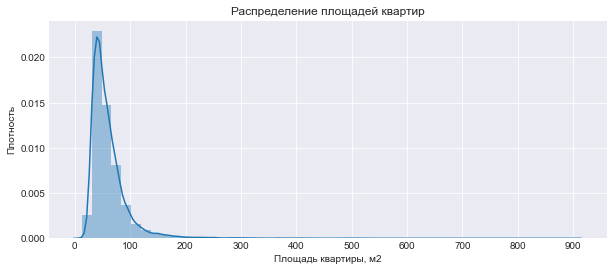

In [134]:
mpl.style.use(['seaborn-darkgrid'])
plt.figure(figsize=(10, 4))
sns.distplot(main_data['total_area'], bins=50)
plt.title('Распределение площадей квартир')
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Плотность')
plt.xticks(np.arange(0, 1000, 100.0))
plt.show()

Большая часть квартир имеет площадь менее 100 кв.м. Небольшую долю составляют квартиры от 100 кв.м до 190 кв.м. Остальные это уже единичные объекты. Определим границы выброса для общей площади квартир

In [135]:
display(IQR1_5(main_data, 'total_area'))

(-5.0, 115.0)

Обозначим минимум и максимум как 0 кв.м. и 115 кв.м. и снова изучим гистограмму, увеличим количество корзин до 20

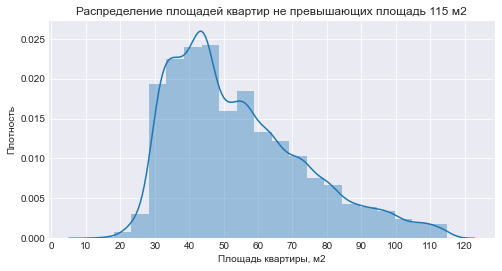

In [136]:
plt.figure(figsize=(8, 4))
sns.distplot(main_data[main_data['total_area'] <= 115]['total_area'], bins=20)
plt.title('Распределение площадей квартир не превышающих площадь 115 м2')
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Плотность')
plt.xticks(np.arange(0, 130, 10.0))
plt.show()

Теперь видно, что пик количества квартир по площадям находится в диапозоне от 27 до 58 кв.м. А далее чем больше площадь, тем меньше квартир на продажу. Менее 27 кв.м. аналогичная ситуация, чем меньше площадь, тем меньше объектов.

Изучим гистограмму квартир боллее 115 кв.м.

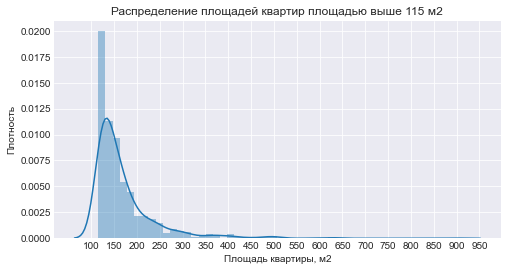

In [137]:
plt.figure(figsize=(8, 4))
sns.distplot(main_data[main_data['total_area'] > 115]['total_area'], bins=50)
plt.title('Распределение площадей квартир площадью выше 115 м2')
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Плотность')
plt.xticks(np.arange(100, 1000, 50.0))
plt.show()

Небольшая доля квартир, от которой не хотелось бы избавляться при анализе, находится в диапозоне от 115 до 300 кв.м. Проверим количество квартир более 300 кв.м.

In [138]:
display(main_data.query('total_area > 300')['total_area'].count())

61

61 квартира с разбросом по площади от 300 до 900 кв.м. Количество небольшое, менее 0.3 %, а разброс огромный. Лучше пометить эти квартиры на выброс. Для анализа будем принимать квартиры до 300 кв.м.

Выведем гистограмму стоимости квартир за 1 кв.м.

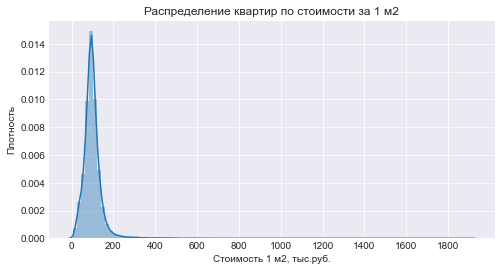

In [139]:
plt.figure(figsize=(8, 4))
sns.distplot(main_data['price_m2'], bins=100)
plt.title('Распределение квартир по стоимости за 1 м2')
plt.xlabel('Стоимость 1 м2, тыс.руб.')
plt.ylabel('Плотность')
plt.xticks(np.arange(0, 1900, 200.0))
plt.show()

Определим границы выброса по стоимости за 1 кв.м.

In [140]:
display(IQR1_5(main_data, 'price_m2'))

(20.359999999999985, 170.58)

Выведем гистограмму стоимости квартир за 1 кв.м. не превышающую 170.58 тыс.руб.

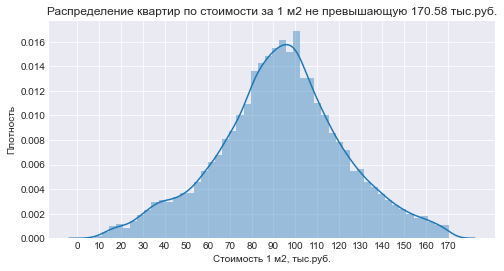

In [141]:
plt.figure(figsize=(8, 4))
sns.distplot(main_data[main_data['price_m2'] <= 170.58]['price_m2'], bins=50)
plt.title('Распределение квартир по стоимости за 1 м2 не превышающую 170.58 тыс.руб.')
plt.xlabel('Стоимость 1 м2, тыс.руб.')
plt.ylabel('Плотность')
plt.xticks(np.arange(0, 180, 10.0))
plt.show()

Распределение нормальное, вероятно цена зависит от населенного пункта и от расстояния до центра. Выведем гистограмму квартир превышающих стоимость 170.58 тыс.руб./ кв.м.

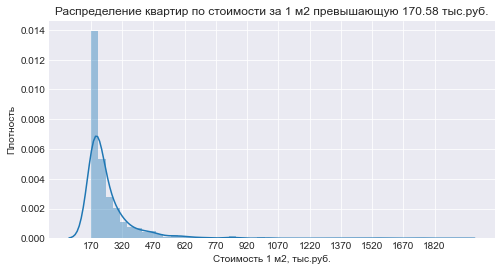

In [142]:
plt.figure(figsize=(8, 4))
sns.distplot(main_data[main_data['price_m2'] > 170.58]['price_m2'], bins=50)
plt.title('Распределение квартир по стоимости за 1 м2 превышающую 170.58 тыс.руб.')
plt.xlabel('Стоимость 1 м2, тыс.руб.')
plt.ylabel('Плотность')
plt.xticks(np.arange(170, 1900, 150.0))
plt.show()

Количество квартир с увеличением стоимости за кв.м. продолжает уменьшаться, но начиная с примерно 600 тыс.руб./ кв.м. такие квартиры совсем редкие. Выведем список таких квартир и изучим

In [143]:
display(main_data.query('price_m2 > 600'))

,position,price,price_m2,total_area,liv_perc,kitch_perc,rooms,balcony,ceiling,class_floor,center_dist,days_exposition,weekday,month,year
1402,Санкт-Петербург,330000.000000,1736.84,190.00,50,21,3,0,3.50,другой,1.1,233,Wednesday,4,2018
2479,Санкт-Петербург,159984.000000,660.00,242.40,54,8,4,0,3.84,другой,2.2,501,Thursday,8,2015
4761,Санкт-Петербург,28000.000000,848.48,33.00,48,24,1,0,3.50,другой,1.3,0,Monday,4,2019
4897,Санкт-Петербург,124000.000000,995.98,124.50,53,16,4,0,3.00,другой,1.7,45,Thursday,10,2017
6004,Санкт-Петербург,40000.000000,612.55,65.30,68,18,2,2,4.10,другой,2.3,497,Thursday,7,2017
6334,Санкт-Петербург,82000.000000,719.29,114.00,68,17,3,0,NaN,другой,3.4,651,Thursday,12,2015
8148,Санкт-Петербург,39900.000000,721.51,55.30,63,14,1,4,3.05,другой,2.1,0,Thursday,10,2017
8714,Санкт-Петербург,190870.000000,712.20,268.00,49,14,3,0,NaN,другой,5.2,901,Friday,3,2016
12703,Санкт-Петербург,763000.000000,1907.50,400.00,62,9,7,2,NaN,последний,3.9,33,Saturday,9,2017
14409,Санкт-Петербург,401300.000000,1000.74,401.00,50,5,5,3,NaN,последний,2.3,393,Saturday,2,2016


Все они находятся в городе Санкт-Петербург в относительной близости от центра. Но есть одна квартира во Всеволожске. Выведем основные статистические показатели стоимости за 1 кв.м. во Всеволожске.

In [144]:
display(main_data.query('position == "Всеволожск"')['price_m2'].describe())

count    389.00000
mean      68.67563
std       31.72640
min       31.40000
25%       59.23000
50%       65.78000
75%       74.07000
max      640.59000
Name: price_m2, dtype: float64

C этой квартирой что то не так, возможно она из золота, неизвестно за что такая цена, но она явно выбивается из общей массы. Будем иметь ее ввиду.

Выведем гистограмму распределения квартир по числу комнат

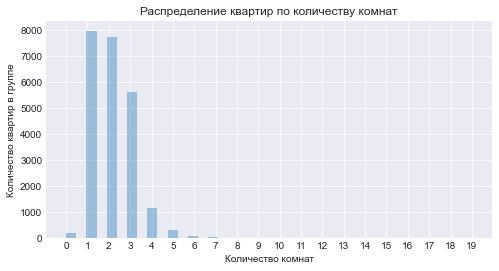

In [145]:
plt.figure(figsize=(8, 4))
sns.distplot(main_data['rooms'], bins=40, kde=False, hist=True)
plt.title('Распределение квартир по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир в группе')
plt.xticks(np.arange(0, 20, 1.0))
plt.show()

Ранее мы приняли, что студии в нашей таблице будут иметь число комнат равное 0. Как видно на гистограмме, их не так много. Так же, квартиры имеющие количнество комнат более 6, совсем редкие. Большинство квартир имеют от 1 до 3 комнат. Выведем гистограмму квартир с количеством комнат более 6.

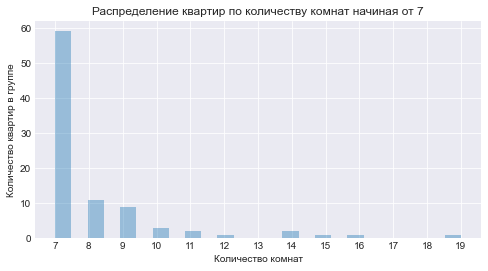

In [146]:
plt.figure(figsize=(8, 4))
sns.distplot(main_data[main_data['rooms'] > 6]['rooms'], bins=25, kde=False, hist=True)
plt.title('Распределение квартир по количеству комнат начиная от 7')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир в группе')
plt.xticks(np.arange(7, 20, 1.0))
plt.show()

Около 60 квартир имеют 7 комнат, остальные квартиры не превышают по количеству 11, в зависимости от количества комнат. Будем считать их совсем редкими

В нашей таблице почти 40% пропущенных значений в столбце "ceiling". Ранее мы удалили часть квартир не попадающих в естественное ограничение высоты потолков от 2.2 м. до 8 м., другую часть мы исправили путем деления на 10. Построим гистограмму на основании имеющихся данных.

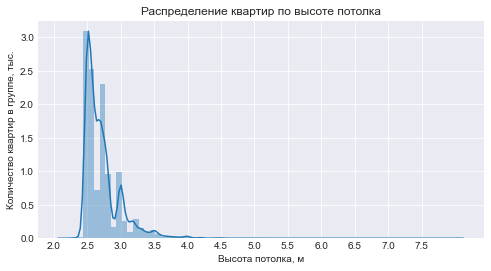

In [147]:
plt.figure(figsize=(8, 4))
sns.distplot(main_data['ceiling'], bins=70)
plt.title('Распределение квартир по высоте потолка')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество квартир в группе, тыс.')
plt.xticks(np.arange(2, 8, 0.5))
plt.show()

Опять ничего не понятно. Выведем две гистограммы с параметром высоты потолка до 3.6 м включительно и выше

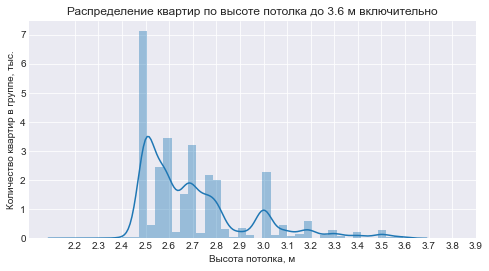

In [148]:
plt.figure(figsize=(8, 4))
sns.distplot(main_data[main_data['ceiling'] <= 3.6]['ceiling'], bins=40)
plt.title('Распределение квартир по высоте потолка до 3.6 м включительно')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество квартир в группе, тыс.')
plt.xticks(np.arange(2.2, 4, 0.1))
plt.show()

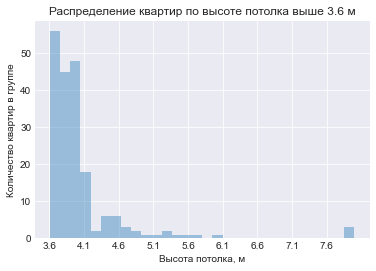

In [149]:
sns.distplot(main_data[main_data['ceiling'] > 3.6]['ceiling'], bins=30, kde=False, hist=True)
plt.title('Распределение квартир по высоте потолка выше 3.6 м')
plt.xlabel('Высота потолка, м')
plt.ylabel('Количество квартир в группе')
plt.xticks(np.arange(3.6, 8, 0.5))
plt.show()

Большая часть квартир имеет высоту потолка в диапозоне от 2.5 метров до 2.8 метров включительно, а так же высоту потолка 3 метра. Остальные же встречаются заметнее реже, но совсем редкими можно назвать квартиры с высотой потолка более 4-х метров.

#### Изучение времени продажи квартиры

Построим гистограмму времени продажи квартиры c временем продажи от 1 дня (объкты с 0 дней по времени продажи ранее имели пропуски)

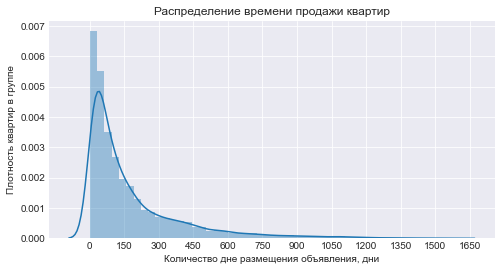

In [150]:
plt.figure(figsize=(8, 4))
sns.distplot(main_data[main_data['days_exposition'] > 0]['days_exposition'], bins=50)
plt.title('Распределение времени продажи квартир')
plt.xlabel('Количество дне размещения объявления, дни')
plt.ylabel('Плотность квартир в группе')
plt.xticks(np.arange(0, 1800, 150))
plt.show()

Определим границы выброса

In [151]:
display(IQR1_5(main_data.query('days_exposition > 0'), 'days_exposition'))

(-248.0, 520.0)

Объекты с времнем продажи более 520 дней можно считать объектами с необычно долгим временем продажи. Выведем среднее и медианное время продажи

In [152]:
display('Среднее количество дней продажи: {:.0f}'\
        .format(main_data\
               .query('days_exposition > 0')['days_exposition'].mean()))
display('Медианное количество дней продажи: {:.0f}'\
        .format(main_data\
               .query('days_exposition > 0')['days_exposition'].median()))

'Среднее количество дней продажи: 180'

'Медианное количество дней продажи: 96'

Из за того, что на гистограмме очень длинный "хвост" с большими показателями по времени продажи квартир, среднее значение в 2 раза превышает медианное, на него нельзя полагаться. Будем считать что обычно продажа квартиры занимает около 3-х месяцев. Выведем основные статистические показатели времени продажи

In [153]:
display(main_data.query('0 < days_exposition')['days_exposition'].describe())

count    20096.000000
mean       179.608280
std        220.560996
min          1.000000
25%         40.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Для изучения быстрых продаж выведем гистограмму с временем продаж менее 40 дней

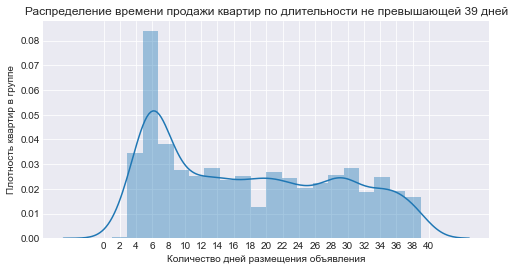

In [154]:
plt.figure(figsize=(8, 4))
sns.distplot(main_data[(main_data['days_exposition'] > 0) &\
                       (main_data['days_exposition'] < 40)]['days_exposition'], bins=20)
plt.title('Распределение времени продажи квартир по длительности не превышающей 39 дней')
plt.xlabel('Количество дней размещения объявления')
plt.ylabel('Плотность квартир в группе')
plt.xticks(np.arange(0, 41, 2.0))
plt.show()

Пик виден в районе 5-6 дней. Примем быстрые продажи длительностью менее 40 дней, а очень быстрыми продажами те продажи, которые длились менее 10 дней.

#### Редкие и выбивающиеся значения

От некорректных выбивающихся значений мы избавились во время предобработки таблицы. Теперь займемся редкими значениями. Для начала в новой переменной сохраним копию последнего варианта таблицы.

In [155]:
data_fin = main_data.copy()

Начнем с стоимости квартир за 1 кв.м.. Ранее мы уже определили границу, превышая которую объекты по стоимости за кв.м. становятся очень редкими, она составляла 600 тыс.руб/кв.м. Оставим таблицу без таких квартир.

In [156]:
data_fin = data_fin.query('price_m2 <= 600')

Ранее мы уже определили квартиры на выброс с общей площадью более 300 кв.м. Таких оказалось 61 квартира с разбросом по площади от 300 до 900 кв.м. Количество небольшое, менее 0.3 %, а разброс огромный. Избавимся от редких значений

In [157]:
data_fin = data_fin.query('total_area <= 300')

Ранее мы определили что квартиры с количеством комнат более 7 можно считать совсем редкими. Посчитаем процент таких квартир.

In [158]:
display(len(data_fin.query('rooms > 7')) * 100 / len(data_fin))

0.08209825865272437

0.08%, это почти ничего, но разброс по количеству комнат составляет от 8 до 19, поэтому лучше удалить такие объекты.

In [159]:
data_fin = data_fin.query('rooms <= 7')

Квартиры с высотой потолка более 4-х метров мы определили как редкие. Выведем общий процент таких квартир.

In [160]:
display(len(data_fin.query('ceiling > 4')) * 100 / len(data_fin))

0.1773049645390071

Менее 0.2%. Много полезных данных мы не потеряем избавившись от редких квартир с высокими потолками

In [161]:
data_fin = data_fin.query('~(ceiling > 4)')

Проверим количество объектов находящихся за границей выброса по параметру "количество дней продажи"

In [162]:
display(data_fin.query('days_exposition > 520')['days_exposition'].count())

1562

Выведем гистограмму таких объектов

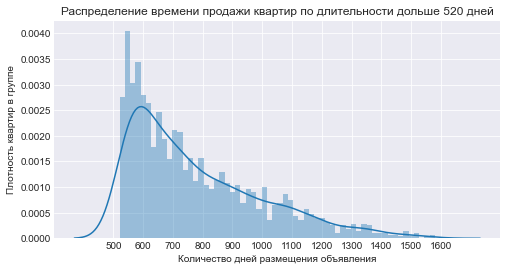

In [163]:
plt.figure(figsize=(8, 4))
sns.distplot(main_data[(main_data['days_exposition'] > 520)]['days_exposition'], bins=60)
plt.title('Распределение времени продажи квартир по длительности свыше 520 дней')
plt.xlabel('Количество дней размещения объявления')
plt.ylabel('Плотность квартир в группе')
plt.xticks(np.arange(500, 1700, 100.0))
plt.show()

Учитывая большое количество объектов за границей выброса по параметру "количество дней продажи", а так же их плавное уменьшение при увеличении количества дней, стоит оставить их, а анализ на основании данного столбца проводить для сравнения с их участием и без их участия.

Необходимые для анализа столбцы мы очистили от редких значений. Кроме того в разделе предобработки данных мы избавились от некорректных выбивающихся значений и определили остальные редкие значения, на основании которых пока не предполагается проводить анализ (например количество балконов превышающее количество комнат более чем на 1). 

#### Изучение факторов влияния на стоимость квартиры

Изучим влияние общей площади квартиры на стоимость квадратного метра. Для более четкого понимания, определим границы "ящика с усами" для цены за кв.м. и для общей площади и используем полученные значения для ограничения графика зависимости

In [164]:
display(IQR1_5(data_fin, 'price_m2'))

(20.612500000000026, 170.03249999999997)

In [165]:
display(IQR1_5(data_fin, 'total_area'))

(-5.0, 115.0)

Выведем график зависимости

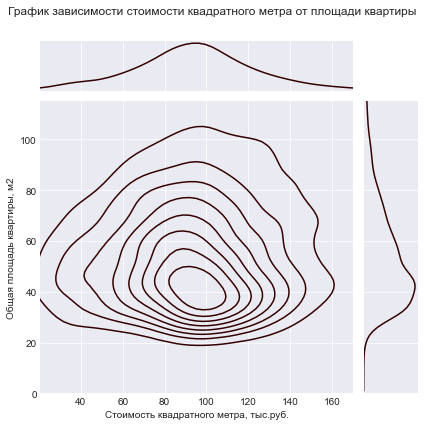

In [166]:
jtp_price_area = sns.jointplot(x = 'price_m2', y = 'total_area', data=data_fin,\
              kind='kde', ylim=(0, 115), xlim=(20.61, 170.03), color="#330000")
jtp_price_area.set_axis_labels('x', 'y', fontsize=10)
jtp_price_area.ax_joint.set_xlabel('Стоимость квадратного метра, тыс.руб.')
jtp_price_area.ax_joint.set_ylabel('Общая площадь квартиры, м2')
jtp_price_area.fig.suptitle('График зависимости стоимости квадратного метра от площади квартиры')
jtp_price_area.ax_joint.collections[0].set_alpha(0)
jtp_price_area.fig.subplots_adjust(top=0.9)

Одно большое пятно, нет никакой зависимости между этими параметрами. Выведем для проверки корреляцию в числовом виде.

In [167]:
display(data_fin.query('20.61 <= price_m2 <= 170.03')['price_m2']\
        .corr(data_fin.query('0 <= total_area <= 115')['total_area']))

0.03962394529175381

Действительно, корреляция почти равна 0. Но это неудивительно, ведь в данном подразделе мы рассматриваем общую зависимость, без разделения на населенные пункты.

Изучим влияние количества комнат квартиры на стоимость квадратного метра. Определим границы "ящика с усами" для количества комнат и используем полученные значения для ограничения графика зависимости

In [168]:
display(IQR1_5(data_fin, 'rooms'))

(-2.0, 6.0)

Выведем график зависимости

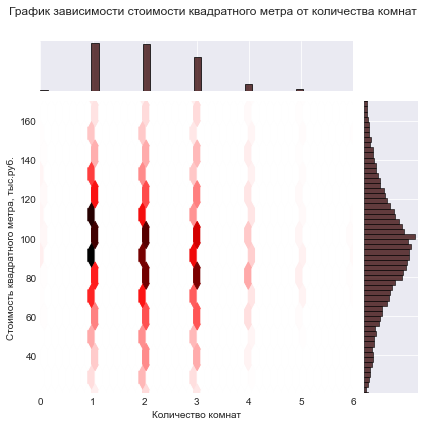

In [169]:
jtp_price_rooms = sns.jointplot(y = 'price_m2', x = 'rooms', data=data_fin,\
              kind='hex', xlim=(0, 6), ylim=(20.61, 170.03), color="#330000")
jtp_price_rooms.set_axis_labels('x', 'y', fontsize=10)
jtp_price_rooms.ax_joint.set_xlabel('Количество комнат')
jtp_price_rooms.ax_joint.set_ylabel('Стоимость квадратного метра, тыс.руб.')
jtp_price_rooms.fig.suptitle('График зависимости стоимости квадратного метра от количества комнат')
jtp_price_rooms.fig.subplots_adjust(top=0.9)

И снова нет явной зависимости между этими параметрами. Выведем для проверки корреляцию в числовом виде.

In [170]:
display(data_fin.query('20.61 <= price_m2 <= 170.03')['price_m2']\
        .corr(data_fin.query('0 <= rooms <= 6')['total_area'])) 

0.09643648047390527

Изучим влияние расстояния от центра на стоимость квадратного метра. Определим границы "ящика с усами" для расстояния от центра и используем полученные значения для ограничения графика зависимости

In [171]:
display(IQR1_5(data_fin, 'center_dist'))

(-1.1999999999999993, 26.8)

Выведем график зависимости

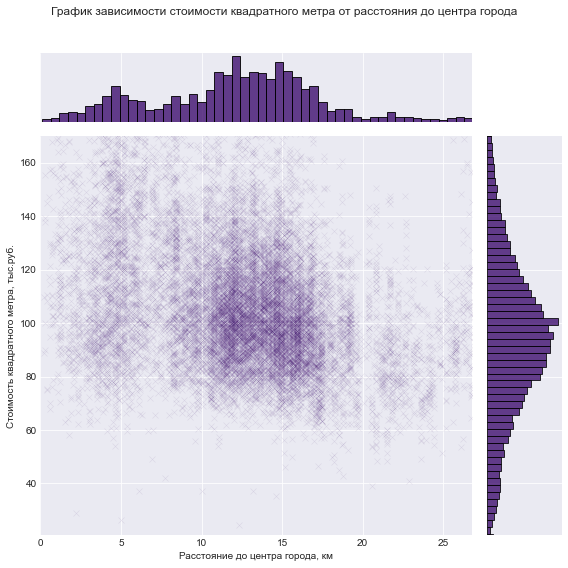

In [172]:
jtp_price_center_dist = sns.jointplot(y = 'price_m2', x = 'center_dist', data=data_fin,\
              kind='scatter', xlim=(0, 26.8), ylim=(20.61, 170.03),\
                                      color="#330066", size=8, alpha=0.1, marker='x')
jtp_price_center_dist.set_axis_labels('x', 'y', fontsize=10)
jtp_price_center_dist.ax_joint.set_xlabel('Расстояние до центра города, км')
jtp_price_center_dist.ax_joint.set_ylabel('Стоимость квадратного метра, тыс.руб.')
jtp_price_center_dist.fig.\
    suptitle('График зависимости стоимости квадратного метра от расстояния до центра города')
jtp_price_center_dist.fig.subplots_adjust(top=0.9)

Для наглядности выведем график в другом формате

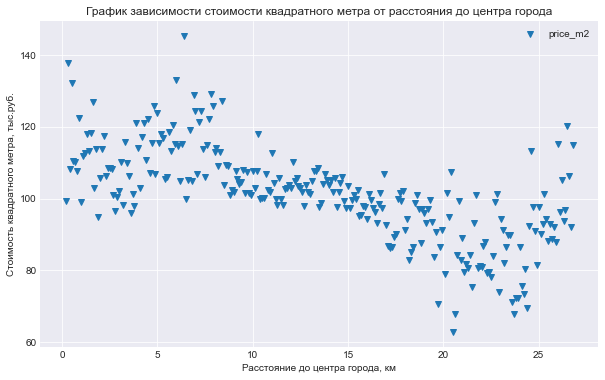

In [173]:
data_fin\
    .query('20.61 <= price_m2 <= 170.03 and center_dist <= 26.8')\
    .pivot_table(index='center_dist', values='price_m2', aggfunc='median')\
    .plot(grid=True, figsize=(10, 6), style='v')
plt.title('График зависимости стоимости квадратного метра от расстояния до центра города')
plt.xlabel('Расстояние до центра города, км')
plt.ylabel('Стоимость квадратного метра, тыс.руб.')
plt.show()

Просматривается небольшая зависимость на расстоянии от центра в диапозоне от 5 до 20 км. Чем дальше от центра, тем меньше стоимость одного кв.м. Проверим корреляцию в числовом значении

In [174]:
display(data_fin.query('20.61 <= price_m2 <= 170.03')['price_m2']\
        .corr(data_fin.query('center_dist <= 26.8')['center_dist']))

-0.303353876178477

Да, небольшая зависимость присутствует. Но , возможно, она бы ярче выражалась внутри Санкт-Петербурга

Изучим зависимость цены от этажа объекта

In [175]:
data_fin['class_floor'] = data_fin['class_floor'].astype('category')

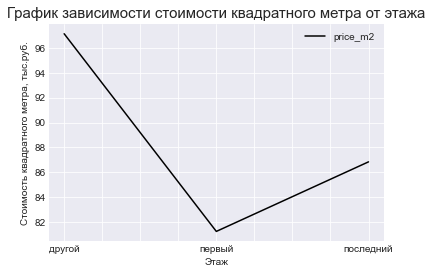

In [176]:
data_fin\
        .query('20.61 <= price_m2 <= 170.03')\
        .pivot_table(index='class_floor', values='price_m2', aggfunc='median')\
        .plot(style='k')
plt.title('График зависимости стоимости квадратного метра от этажа', size=15)
plt.xlabel('Этаж', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.show()

Зависимость четко просматривается. Дешевле всех квартиры на 1 этаже. Заментно дороже квартиры на поседнем этаже. А квартиры на любом другом этаже дороже остальных на порядок.

Изучим зависимость стоимости квадратного метра от даты размещения, а именно от дня недели, месяца, и года. Начнем с дня недели.

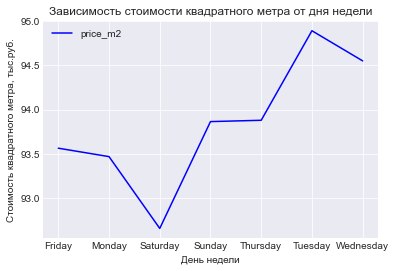

In [177]:
data_fin\
        .query('20.61 <= price_m2 <= 170.03')\
        .pivot_table(index='weekday', values='price_m2', aggfunc='median')\
        .plot(style='b',\
              title='Зависимость стоимости квадратного метра от дня недели')
plt.xlabel('День недели', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.show()

В понедельник, четверг, пятницу и воскресенье стоимость квадратного метра примерно одинаковая, дешеле всех оказались объявления размещенные в субботу, а заметно дороже всех оказались объявления размещенные во вторник и в среду. Но разница между "худшим" и "лучшим" днем составляет менее 1%. Изучим зависимость стоимости квадратного метра от месяца размещения объявления. 

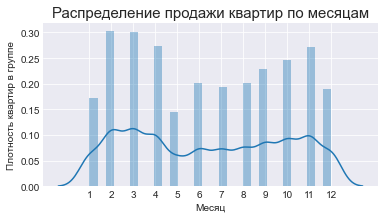

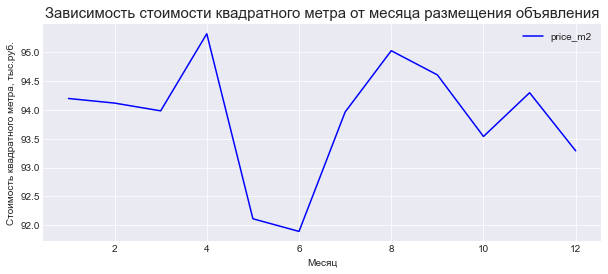

In [178]:
plt.figure(figsize=(6, 3))
sns.distplot(data_fin[(data_fin['price_m2'] >= 20.61) & \
                      (data_fin['price_m2'] <= 170.03)]['month'], bins=30)
plt.title('Распределение продажи квартир по месяцам', size=15)
plt.xlabel('Месяц', size=10)
plt.ylabel('Плотность квартир в группе', size=10)
plt.xticks(np.arange(1, 13, 1.0))
data_fin\
        .query('20.61 <= price_m2 <= 170.03')\
        .pivot_table(index='month', values='price_m2', aggfunc='median')\
        .plot(style='b', grid=True, figsize=(10, 4))
plt.title('Зависимость стоимости квадратного метра от месяца размещения объявления', size=15)
plt.xlabel('Месяц', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.show()

Дешевле всего стоимость квадратного метра объекта, размещенного в мае и июне. Дороже всего в августе и апреле, остальные месяцы примерно на одном уровне. Изучим зависимость стоимости квадратного метра от года размещения объявления.

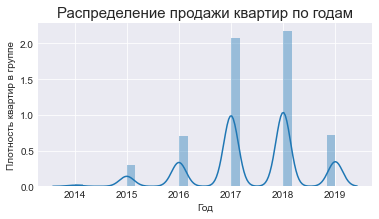

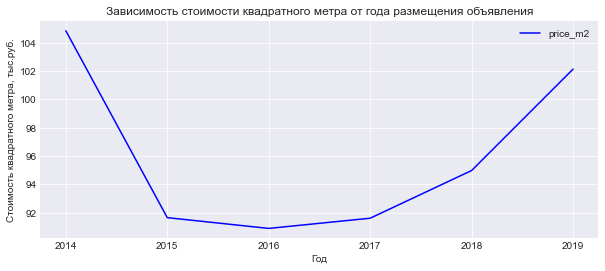

In [179]:
plt.figure(figsize=(6, 3))
sns.distplot(data_fin[(data_fin['price_m2'] >= 20.61) & \
                      (data_fin['price_m2'] <= 170.03)]['year'], bins=30)
plt.title('Распределение продажи квартир по годам', size=15)
plt.xlabel('Год', size=10)
plt.ylabel('Плотность квартир в группе', size=10)
plt.xticks(np.arange(2014, 2020, 1.0))
data_fin\
        .query('20.61 <= price_m2 <= 170.03')\
        .pivot_table(index='year', values='price_m2', aggfunc='median')\
        .plot(style='b', grid=True, figsize=(10, 4),\
              title='Зависимость стоимости квадратного метра от года размещения объявления')
plt.xlabel('Год', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.show()

Дороже всего квартиры были в 2014 году, однако в выборке их очень мизерное количество. Далее к 2015 году стоимость квартир резко снизилась  и держалась на низкой отметке до 2017 года. После 2017 года стоимость квартир постепенно вернулась почти на уровень стоимости 2014 года.

#### Изучение стоимости жилья в 10 населенных пунктах с наибольшим количеством объявлений

Сохраним в переменной сводную таблицу, индексом которой будет наименование населенного пункта, а значениями - количество объявлений и медианная стоимость квадратного метра квартиры.

In [180]:
position_top10 = data_fin\
    .pivot_table(index='position', values='price_m2', aggfunc=['count', 'median'])

Изменим наименование колонок

In [181]:
position_top10.columns = ['count', 'median_price_m2']

Оставим в сводной таблице 10 населенных пунктов с наибольшим количеством объявлений, отсортируем ее по убыванию стоимости кв.м., выведем и проанализируем

In [182]:
position_top10 = position_top10.sort_values(by='count', ascending=False).head(10)
display(position_top10.sort_values(by='median_price_m2', ascending=False))

,count,median_price_m2
position,,
Санкт-Петербург,15279,104.680
Пушкин,360,99.990
Кудрово,459,95.840
Парголово,322,91.575
Мурино,575,86.110
Шушары,432,76.740
Колпино,328,75.000
Гатчина,302,67.410
Всеволожск,387,65.780


Самые дорогие квартиры, не считая конечно Санкт-Петербург, находятся в Пушкино и Кудрово. Дешевле всех квартиры в нашей выборке оказались в  Выборге.

#### Центр Санкт-Петербурга

Для определения центра Санкт-Петербурга, а также для дальнейшего его сравнения со всем городом сохраним две переменные: в одной будут все объявления по Санкт-Петербургу, в другой объявления по Санкт-Петербургу имеющие информацию по расстоянию от центра. Вторую переменную мы в итоге сократим, оставив только те квартиры, которые относятся к центру Санкт-Петербурга.

In [183]:
data_piter = data_fin.query('position == "Санкт-Петербург"')
data_piter_centr = data_piter[data_piter['center_dist'].isna() != True]

Далее продолжим изменять только переменную data_piter_centr. Добавим столбец расстояния до центра в целых километрах.

In [184]:
display(data_piter_centr.head())

,position,price,price_m2,total_area,liv_perc,kitch_perc,rooms,balcony,ceiling,class_floor,center_dist,days_exposition,weekday,month,year
0,Санкт-Петербург,13000.0,120.37,108.00,47,23,3,0,2.69,другой,16.0,0,Thursday,3,2019
2,Санкт-Петербург,5196.0,92.78,56.00,61,14,2,0,NaN,другой,13.9,558,Thursday,8,2015
3,Санкт-Петербург,64900.0,408.17,159.00,61,13,3,0,NaN,другой,6.8,424,Friday,7,2015
4,Санкт-Петербург,10000.0,100.00,100.00,32,41,2,0,3.02,другой,8.0,121,Tuesday,6,2018
7,Санкт-Петербург,7915.0,110.56,71.59,57,26,2,2,NaN,другой,11.6,0,Thursday,4,2019


In [185]:
data_piter_centr['center_dist_int'] = data_piter_centr['center_dist'].apply(rounding)

Определим границы "ящика с усами" для стоимости одного квадратного метра

In [186]:
display(IQR1_5(data_piter_centr, 'price_m2'))

(41.52500000000001, 173.48499999999999)

В переменной сохраним сводную таблицу в которой индексом будет расстояние от центра а значением медианная стоимость квадратного метра по каждому километру без учета редких значений

In [187]:
piter_centr_pivot = data_piter_centr.query('41.53 <= price_m2 <= 173.48')\
                                    .pivot_table(index='center_dist_int', values='price_m2', aggfunc='median')

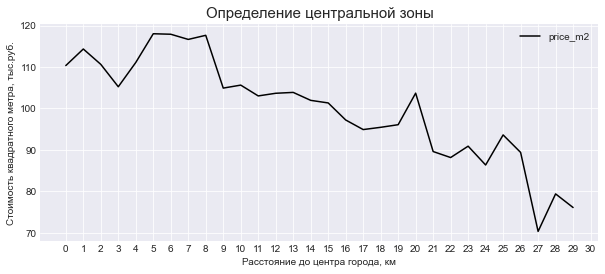

In [188]:
piter_centr_pivot.plot(style='k', grid=True, figsize=(10, 4))
plt.title('Определение центральной зоны', size=15)
plt.xlabel('Расстояние до центра города, км', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.xticks(np.arange(0, 31, 1.0))
plt.show()

По графику можно предположить, что самая "престижная" зона находится в среднем в 6 км. от центра города. По ней мы и определим границу центральной зоны, которую приравняем к 8 км, именно в этом месте цена квадратного метра заметно дешевеет. Оставим в переменной data_piter_centr только те квартиры, которые относятся к центральной зоне.

In [189]:
data_piter_centr = data_piter_centr.query('center_dist <= 8')

#### Изучение факторов влияния на стоимость квартир в центральной зоне Санкт-Петербурга

Ранее мы уже определили границу "ящика с усами" для всего Санкт-Петербурга. Используем ее для очистки от редких квартир по стоимости за квадратный метр для таблицы по всему городу

In [190]:
data_piter = data_piter.query('41.53 <= price_m2 <= 173.48')

Определим границу "ящика с усами" для центральной зоны

In [191]:
display(IQR1_5(data_piter_centr, 'price_m2'))

(18.56500000000004, 235.08499999999995)

Применим значения и очистим центральную зону от редких квартир

In [192]:
data_piter_centr = data_piter_centr.query('18.57 <= price_m2 <= 235.08')

Изучим зависимость площади квартиры от ее расположения. Выведем совместную гистограмму распределения площадей

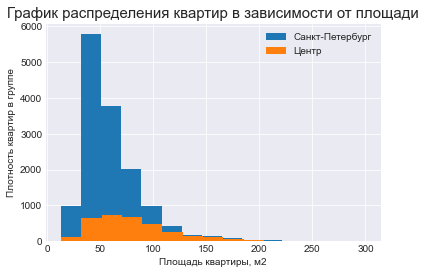

In [193]:
ax1=data_piter.hist('total_area', bins=15, label='Санкт-Петербург')
data_piter_centr.hist('total_area', ax=ax1, bins=15, label='Центр')
plt.title('График распределения квартир в зависимости от площади', size=15)
plt.xlabel('Площадь квартиры, м2', size=10)
plt.ylabel('Плотность квартир в группе', size=10)
plt.legend()
plt.show()

Нет никакой зависимости от местоположения, квартиры с разными площадями имеют примерно одинаковое распределение как во всем городе так и в центральной зоне, разве что можно выделить квартиры с площадью от 40 до 70 кв.м. Они в центральной зоне встречаются заметно реже.

Выведем основные статистические показатели стоимости квадратного метра в центре и во всем городе

In [194]:
display('Основные статистические показатели стоимости квадратного метра в центре')
display(data_piter_centr['price_m2'].describe())

'Основные статистические показатели стоимости квадратного метра в центре'

count    3351.000000
mean      125.035900
std        35.214418
min        26.250000
25%        98.325000
50%       119.420000
75%       145.680000
max       234.950000
Name: price_m2, dtype: float64

In [195]:
display('Основные статистические показатели стоимости квадратного метра в Санкт-Петербурге')
display(data_piter['price_m2'].describe())

'Основные статистические показатели стоимости квадратного метра в Санкт-Петербурге'

count    14493.000000
mean       106.701228
std         22.539493
min         41.910000
25%         90.340000
50%        103.120000
75%        120.310000
max        173.440000
Name: price_m2, dtype: float64

Как в случае и со средней стоимостью квадратного метра, так и в случае медианного заметно, что в центре стоимость квадратного метра на порядок выше средней/медианной стоимости во всем городе. То же было заметно на графике определения центральной зоны.

Проверим, одинаково ли популярны квартиры в центральной зоне и в общем по городу в зависимости от числа комнат. Выведем гистограмму распределения

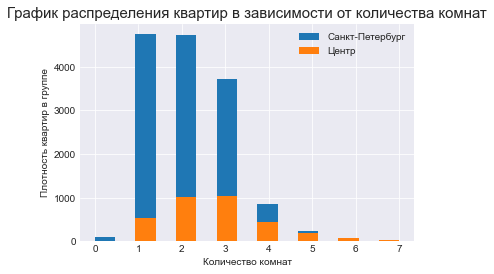

In [196]:
ax2=data_piter.hist('rooms', bins=15, label='Санкт-Петербург')
data_piter_centr.hist('rooms', ax=ax2, bins=15, label='Центр')
plt.title('График распределения квартир в зависимости от количества комнат', size=15)
plt.xlabel('Количество комнат', size=10)
plt.ylabel('Плотность квартир в группе', size=10)
plt.legend()
plt.show()

Как видно по гистограмме, большая часть квартир на продажу имеет одну или две комнаты, чуть меньшее количество квартир имеют 3 комнаты. Но в центре ситуация совсем другая. Большая часть вартир имеет две или 3 комнаты, причем доля трехкомнатных квартир в центре составляет почти треть от обего количества, доля 4-х комнатных составляет уже половину от общего количества, и большая часть квартир с количеством комнат от 5 до 7 располагаются в центре.

Изучим тем же методом различие между центром и всем городом в высоте потолков

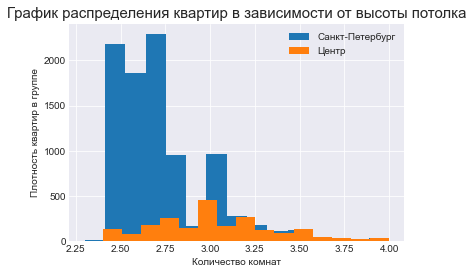

In [197]:
ax3=data_piter.hist('ceiling', bins=15, label='Санкт-Петербург')
data_piter_centr.hist('ceiling', ax=ax3, bins=15, label='Центр')
plt.title('График распределения квартир в зависимости от высоты потолка', size=15)
plt.xlabel('Количество комнат', size=10)
plt.ylabel('Плотность квартир в группе', size=10)
plt.legend()
plt.show()

Как видно по гистограмме, во всем городе преобладают квартиры с высотой потолка от 2.5 до 2.75 м. Но отдельно в центре ситуация меняется, тут преобладают квартиры с высотой потолка от 3 до 3.2 м., и большая часть квартир с высотой потолка выше 2.75 м. находятся в центре. 

Выведем совместный график зависимости стоимости квадратного метра от количества комнат для всего города и для центальной зоны

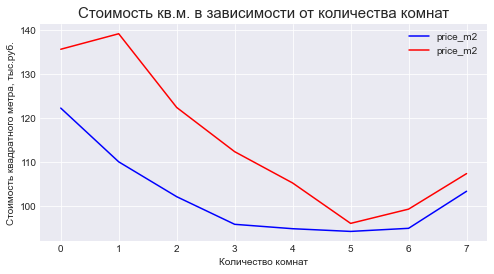

In [198]:
ax6 = data_piter\
    .pivot_table(index='rooms', values='price_m2', aggfunc='median')\
    .plot(style='b', grid=True, figsize=(8, 4))
data_piter_centr\
    .pivot_table(index='rooms', values='price_m2', aggfunc='median')\
    .plot(ax = ax6, style='r', grid=True, figsize=(8, 4))
plt.title('Стоимость кв.м. в зависимости от количества комнат', size=15)
plt.xlabel('Количество комнат', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.show()

Выведем коэффициент корреляции для всего города

In [199]:
display(data_piter['price_m2'].corr(data_piter['rooms']))

-0.19575574164613507

Выведем коэффициент корреляции для центральной зоны

In [200]:
display(data_piter_centr['price_m2'].corr(data_piter_centr['rooms']))

-0.2486687418394493

Как видно на графиках, есть зависимость между количеством комнат и стоимостью квадратного метра. В центральной зоне она проявляется немного ярче. В основном, чем больше комнат в квартире, тем меньше стоимость квадратного метра. Но в случае с 6-ю и 7-ми комнатными квартирами, зависимость обратная. Кроме того присутствует существенное различие между городом и его центральной частью: в городе 1 кв.м. студии в среднем стоит больше, чем 1 кв.м. однокомнатной квартиры, но в центре ситуация обратная.

Выведем график зависимости стоимости квадратного метра от этажа квартиры в городе

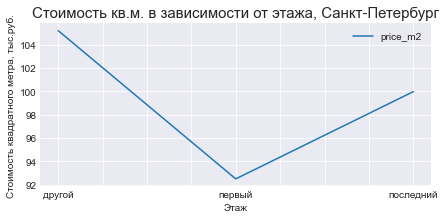

In [201]:
data_piter\
    .pivot_table(index='class_floor', values='price_m2', aggfunc='median')\
    .plot(style='-', grid=True, figsize=(7, 3))
plt.title('Стоимость кв.м. в зависимости от этажа, Санкт-Петербург', size=15)
plt.xlabel('Этаж', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.show()

Выведем график зависимости стоимости квадратного метра от этажа квартиры в центральной зоне

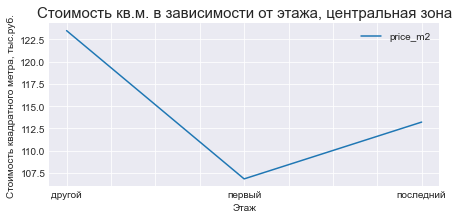

In [202]:
data_piter_centr\
    .pivot_table(index='class_floor', values='price_m2', aggfunc='median')\
    .plot(style='-', grid=True, figsize=(7, 3))
plt.title('Стоимость кв.м. в зависимости от этажа, центральная зона', size=15)
plt.xlabel('Этаж', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.show()

Как видно на графике, зависимость стоимости квадратного метра от этажа квартиры в по всему городу ничем не отличается от той же зависимости в центральной зоне. Дешевле всего квартиры на первом этаже, подороже на последнем, и самая большая стоимость у квартир между первым и последним этажами.

Выведем график зависимости стоимости квадратного метра от расстояния до центра по всему городу

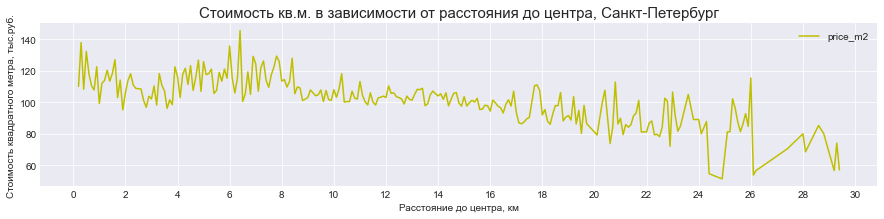

In [203]:
data_piter\
    .pivot_table(index='center_dist', values='price_m2', aggfunc='median')\
    .plot(style='y', grid=True, figsize=(15, 3))
plt.title('Стоимость кв.м. в зависимости от расстояния до центра, Санкт-Петербург', size=15)
plt.xlabel('Расстояние до центра, км', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.xticks(np.arange(0, 31, 2.0))
plt.show()

Выведем график зависимости стоимости квадратного метра от расстояния до центра в центральной зоне

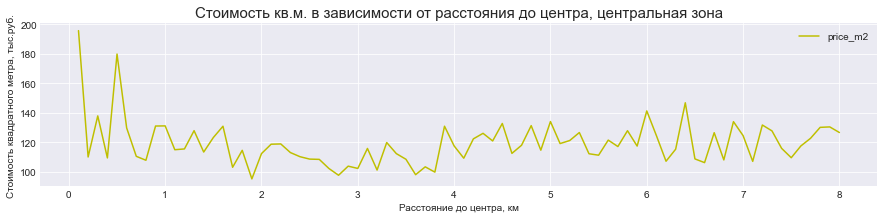

In [204]:
data_piter_centr\
    .pivot_table(index='center_dist', values='price_m2', aggfunc='median')\
    .plot(style='y', grid=True, figsize=(15, 3))
plt.title('Стоимость кв.м. в зависимости от расстояния до центра, центральная зона', size=15)
plt.xlabel('Расстояние до центра, км', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.xticks(np.arange(0, 9, 1.0))
plt.show()

Есть слабая зависимость от расстояния до центра, если рассматривать весь город. В центре она естественно выше, но далее в основном, чем дальше от центральной зоны, тем меньше стоимость квадратного метра. В центральной зоне ситуация иная. Видно, что в радиусе примерно 600 метров стоимость квадратного метра заметно выше чем в остальной области, а дальше 600 метров на расстоянии от центра стоимость критично не изменяется.

Выведем график зависимости стоимости квадратного метра от дня недели размещения объекта по всему городу

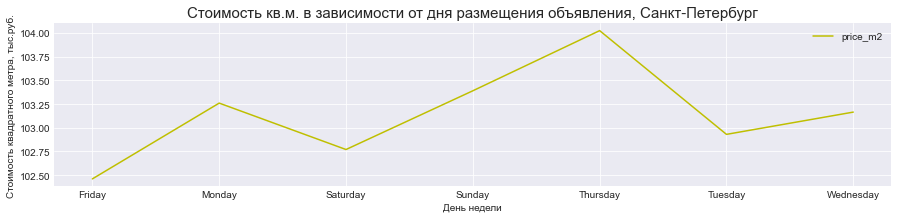

In [205]:
data_piter\
    .pivot_table(index='weekday', values='price_m2', aggfunc='median')\
    .plot(style='y', grid=True, figsize=(15, 3))
plt.title('Стоимость кв.м. в зависимости от дня размещения объявления, Санкт-Петербург', size=15)
plt.xlabel('День недели', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.show()

Выведем график зависимости стоимости квадратного метра от дня недели размещения объекта в центральной зоне

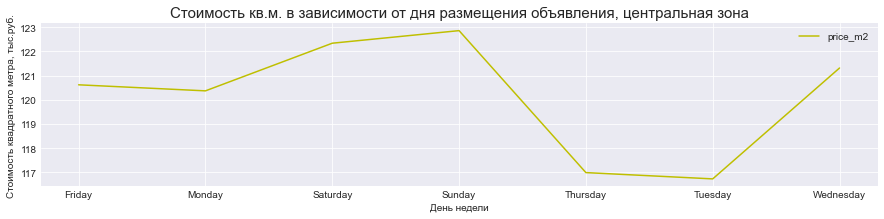

In [206]:
data_piter_centr\
    .pivot_table(index='weekday', values='price_m2', aggfunc='median')\
    .plot(style='y', grid=True, figsize=(15, 3))
plt.title('Стоимость кв.м. в зависимости от дня размещения объявления, центральная зона', size=15)
plt.xlabel('День недели', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.show()

Судя по линиям графиков, можно сказать что зависимость присутствует, но если рассматривать максимальное числовое отклонение, то оно составляет менее 1%, а значит зависимости почти нет.

Выведем график зависимости стоимости квадратного метра от месяца размещения объявления. Синим цветом будет отмечена центральная зона.

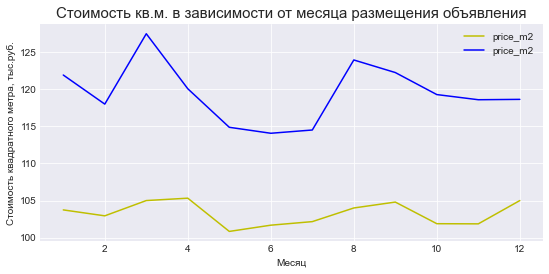

In [207]:
ax4 = data_piter\
    .pivot_table(index='month', values='price_m2', aggfunc='median')\
    .plot(style='y', grid=True, figsize=(9, 4))
data_piter_centr\
    .pivot_table(index='month', values='price_m2', aggfunc='median')\
    .plot(style='b', grid=True, figsize=(9, 4), ax=ax4)
plt.title('Стоимость кв.м. в зависимости от месяца размещения объявления', size=15)
plt.xlabel('Месяц', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.show()

В среднем по всему городу сильной зависимости не наблюдается, но в центральной зоне можно выделить январь, март и август. В эти месяцы стоимость квадратного метра немного выше чем в остальные

Выведем график зависимости стоимости квадратного метра от года размещения объявления. Синим цветом будет отмечена центральная зона.

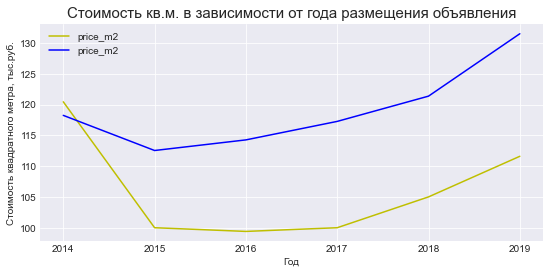

In [208]:
ax5 = data_piter\
    .pivot_table(index='year', values='price_m2', aggfunc='median')\
    .plot(style='y', grid=True, figsize=(9, 4))
data_piter_centr\
    .pivot_table(index='year', values='price_m2', aggfunc='median')\
    .plot(style='b', grid=True, figsize=(9, 4), ax=ax5)
plt.title('Стоимость кв.м. в зависимости от года размещения объявления', size=15)
plt.xlabel('Год', size=10)
plt.ylabel('Стоимость квадратного метра, тыс.руб.', size=10)
plt.show()

Зависимость от года размещения обьявления четко просматривается, для всего города и в отдельности для его центральной зоны максимальная стоимость была зафиксирована в 2014 году, далее в 2015 цена резко упала и держалась примерно на одной отметке до 2017 года. Затем она плавно к 2019 году начала приближаться к стоимости 2014 года. Но есть существенное отличие центральной зоны. В ней стоимость начала плавный подъем сразу после 2015 года и в итоге заметно привысила стоимость, зафиксированную в 2014 году.

### Общий вывод

- В разделах 1.0.1 - 1.0.2: 
    - открыли файл
    - изменили наименование столбцов
    - изучили общую информацию по таблице
    - написали вывод.
    
- В раздеде 1.0.3:
    - на основании вывода в разделе 1.0.2 провели предобработку данных
    - привели к единому виду наименования населенных пунктов
    - для удобства читаемости перевели часть столбцов в необходимые единицы измерения
    - изменили некорректные выбивающиеся значения там, где это было возможно, остальные строки с некорректными выбивающимеся значениями удалили
    - изменили тип данных в необходимых столбцах
    - заменили пропущенные значения в столбцах там, где это было возможно, остальные оставили пустыми
    - написали подробный вывод по разделу
    - во время предобработки данных были выявлены редкие квартиры стоимостью до 763 млн.руб., а так же площадью до 900 кв.м.
    - большая часть квартир в выборке имели от 1 до 7 комнат, но встречались и редкие экземпляры с количеством комнат достигающим 19.
    - часть квартир имели некорректные показатели высоты потолка, минимум 1 метр, максимуму достигал 100 метров
    - в выборке была обнаружена квартира в здании с этажностью в 60 этажей, расположенная в Кронштадте, что явно можно считать недействительным значением этажности.
    - относительно общей площади квартир также имелись неправдоподобные данные, максимальная площадь квартиры составляла 410 м2, но как оказалось подобные квартиры соответствуют действительности, хоть и редкие, но так же был обнаружен ряд квартир общей блощадью менее 10 м2, что явлется некорректным значением
    - в столбце "is_apt" было около 85% пропущенных значений, на основании данного столбца можно было провести отдельное исследование, но ввиду большого количества пропусков это оказалось невозможным
    - был зафиксирван ряд квартир, имеющих превышение по показателю количества балконов, так как в них балконов было более чем на одно значение больше чем количество комнат
    - в столбце с информацией по расстоянию до центра было выявлено 24% пропущенных значений, данный столбец учавствовал в исследованиях, но пришлось их проводить только лишь на основании заполненных строк ввиду невозможности заполнения пропущенных значений данного столбца
    - при изучении общей информации по таблице был случайно обнаружен населенный пункт с наименованием "деревня Русско", которая на самом деле находится в Новгородской области. Неизвестно сколько таких населенных пунктов в выборке, не относящихся к Ленинградской области, но подобные данные могут исказить результаты исследований.
    - была обнаружена одна квартира с очень низкой стоимостью, около 12000 руб., было принято решение удалить ее из таблицы.
    - относительно общей площади квартир так же были выявлены несоответствия, а именно 373 квартиры суммой жилой площади и площади кухни превышали общую площадь квартиры. От таких квартир пришлось отказаться в исселедовании.
    - во время проведения исследования была обнаружена одна квартира во Всеволожске, в которой стоимость 1 м2 (640590 руб) была явно на порядок выше средней стоимости 1м2 в данном населенном пункте (68570 руб).
    
- В разделе 1.0.4:
    - добавили в таблицу столбцы: 
        - стоимость квадратного метра; 
        - день недели публикации объявления, а так же месяц и год публикации;
        - категорию этажа квартиры;
        - проценты занимаемой площади жилой зоны и кухни.
    - подготовили функцию для определения границ выброса
    - сохранили в переменной копию таблицы, в которой оставили только необходимые столбцы для дальнейшего анализа.
    
- В разделе 1.0.5:
    - изучили основные параметры квартир
    - изучили время продажи квартир
    - избавились от редких значений для дальнейшего анализа
    - провели исследовательский анализ данных и выполнили поставленные задачи.
    - Под каждым исследованием написали краткий вывод.
    - Как выяснилось, нормальным временем продажи квартиры можно считать промежуток дней от 10 до 520-ти. 
    - Так же в выборке присутствовали квартиры с очень быстрым временем продажи - от 1 до 10 дней. 
    - Кроме того часть квартир имели необычно долгое время продажи, достигавшее 1580 дней. 
    - При изучении факторов влияния на стоимость квартиры, пришли к выводу, что необходимо рассматривать все факторы для каждого населенного пункта по отдельности, и кроме того для крупных населенных пунктов применять разделение на центральную зону и общую. Но даже без такого разделения по выборке корреляция между расстоянием до центра и стоимостью 1м2 составляла -0.3, и была частично видна на графике.
    - Вне зависимости от населенного пункта было установлено, что медианная стоимость квадратного метра квартиры на первом этаже ниже всего, и составляет примерно 81000 руб./м2. На верхнем этаже медианная стоимость оказалась около 87000 руб/м2,  и дороже всего квартиры на остальных этажах - около 97000 руб/м2. Самым дрогим городом в нашей выборке, как ни странно, оказался Санкт-Петербург - 104680 руб/м2 в среднем. Так же можно выделить еще 3 дорогих населенных пунктов - Пушкин (99980 руб/м2), Кудрово (95840 руб/м2) и Парголово (91575 руб/м2).
    - Для Санкт-Петербурга удалось выяснить границу центральной зоны, она составила 8км от центра. Проводя исследование, мы выяснили что, в отличии от показателей по всему Санкт-Петербургу, в центре гораздо меньше квартир от 40 до 70 м2 в соотношении с остальными. Кроме того, если во всем городе преобладают квартиры с количеством комнат 1-2, то в центре преобладают квартиры с количеством комнат 2-3, а так же квартиры с количеством комнат больше 3 находятся по большей части в центральной зоне.
    - Так же исследование показало что в Санкт-Петербурге обычно высота потолков составляет 2,5-2,75 метра, но в центре ситуация иная, тут преобладают квартиры с высотой потолка в 3 метра и выше.
    - Как для города, так и для его центральной зоны, исследование показало, что существует обратная зависимость стоимости квадратного метра от количества комнат. Чем больше комнат в квартире, тем меньше стоимость квадратного метра.
    - Для города за пределами центральной зоны существует зависимость от расстояния до центра, чем дальше от центра располагается квартира, тем меньше стоимость 1м2. Для центральной зоны такой зависимости не обнаружено, стоимость квадратного метра примерно на одном уровне, но в радиусе 600 метров от центра квртиры заметно дороже чем в остальной центральной зоне.
    - Так же была обнаружена зависимость от года размещения объявления. В 2015 году стоимость квадратного метра медианно для Санкт-Петербурга и отдельно для его центральной зоны составляла 100000 руб/м2 и 113000 руб/м2 соответственно. До 2019 года она постепенно росла, и в итоге для Санкт-Петербурга достигла 112000 руб/м2, а для его центральной зоны 132000 руб/м2.